<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>
Solve the task fo Prcatice Day 1 and put you solution (that means cells and outputs) below

This practice task is desinged for impriving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [1]:
# start with this code
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

/home/gasia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## monthly_wage.csv :

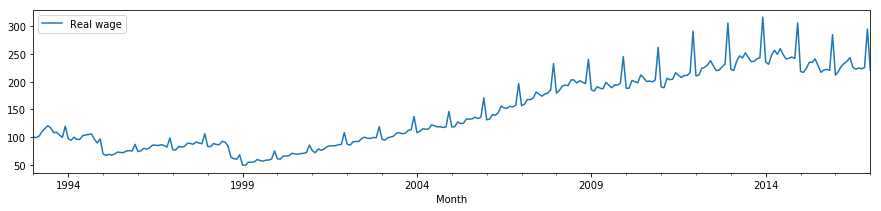

In [2]:
ts = pd.read_csv('./data/mothly_wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(15,3))

In [3]:
print(ts.shape)
print(ts.head())
print('\n', ts.tail())

(289, 1)
            Real wage
Month                
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

             Real wage
Month                
2016-09-01      224.9
2016-10-01      223.6
2016-11-01      225.6
2016-12-01      295.3
2017-01-01      220.3


In [4]:
ts['Real wage'].describe()

count    289.000000
mean     147.038478
std       66.595362
min       48.770000
25%       86.760000
50%      124.500000
75%      207.600000
max      316.800000
Name: Real wage, dtype: float64

From the plot we can see an obvious trends, in the first part until year 1999, the trend is almost decreasing, then starting from 1999 the trend is increasing. There is a changes in level in TS as the trend is strictly increasing after 1999, and also there is seasonality, let's check the period of the seasonality:

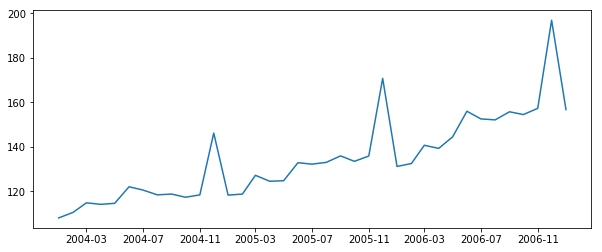

In [5]:
plt.figure(figsize=(10,4))
plt.plot(ts.loc['2004-01-01': '2007-01-01'])
plt.show()

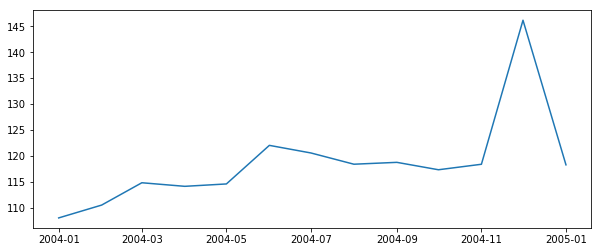

In [6]:
plt.figure(figsize=(10,4))
plt.plot(ts.loc['2004-01-01': '2005-01-01'])
plt.show()

The period of the seasonality is one year which means 12.
We can say that we almost have multiplicative trend with additive seasonality

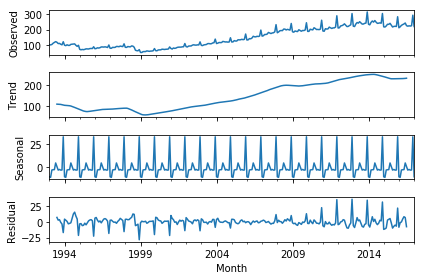

In [7]:
res = sm.tsa.seasonal_decompose(ts['Real wage'].loc['1993-01-01':'2017-01-01'].resample("M").sum())
resplot = res.plot()

WE can also notice the trend and seasonality from the decomposite graphs too

## TS_dep36.csv :

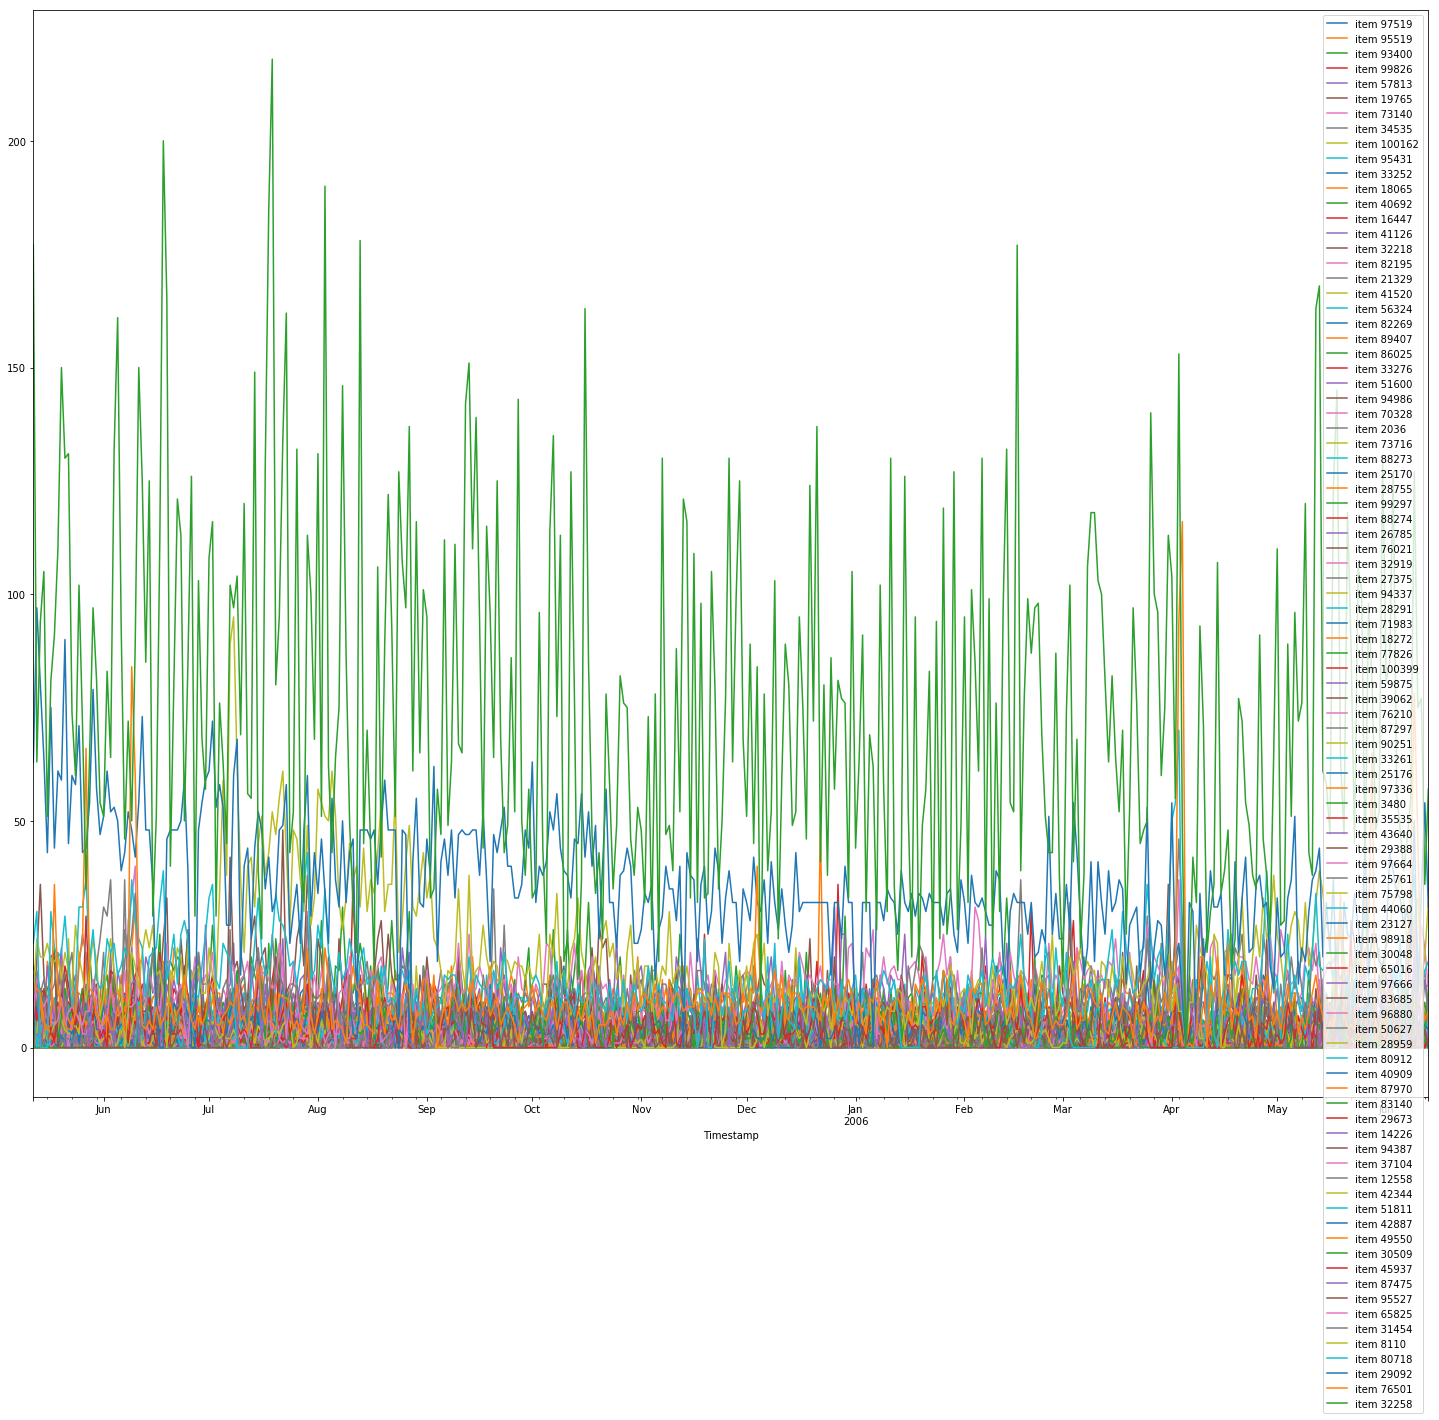

In [8]:
ts = pd.read_csv('./data/TS_dep36.csv', sep=';', decimal='.', index_col= 'Timestamp', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(25,20))

Aggregate the data to make the plot clearer

In [9]:
ts_sum = pd.DataFrame(ts.sum(axis=1), columns = ['data'])

In [10]:
ts_sum.head()

data
Timestamp        
2005-05-12  625.0
2005-05-13  620.0
2005-05-14  528.0
2005-05-15  465.0
2005-05-16  448.0

In [11]:
ts_sum.shape, ts.shape

((398, 1), (398, 105))

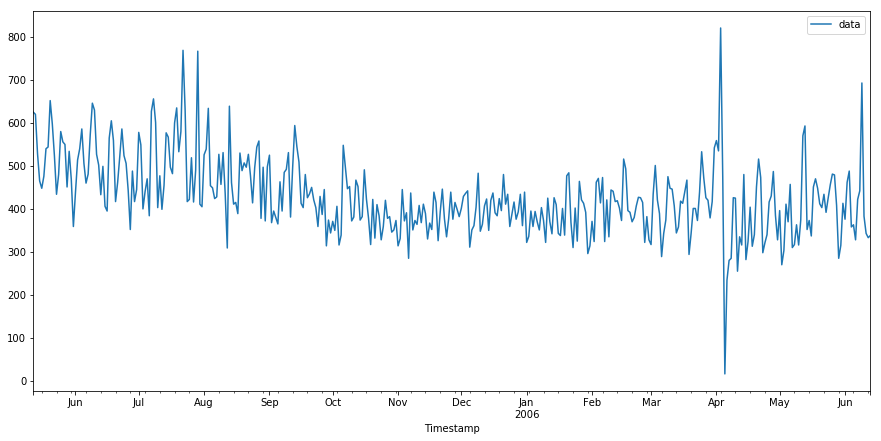

In [12]:
ts_sum.plot(figsize=(15,7))

There isn't an obvious seasonality, the same for trend (we will check later in decomposite graph). Although we can say that at some point near August 2005 there is slowly decreasing trend. Considering the small changes in the trend, we can say that there is a small changes in level in TS.

In [15]:
ts_sum.shape

(398, 1)

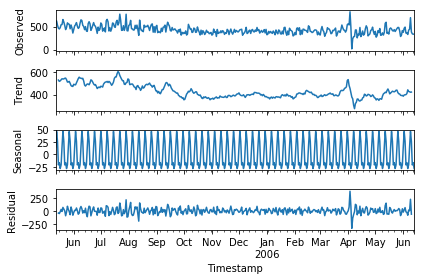

In [16]:
res = sm.tsa.seasonal_decompose(ts_sum['data'].resample("D").sum())
resplot = res.plot()
Seasonal = res.seasonal

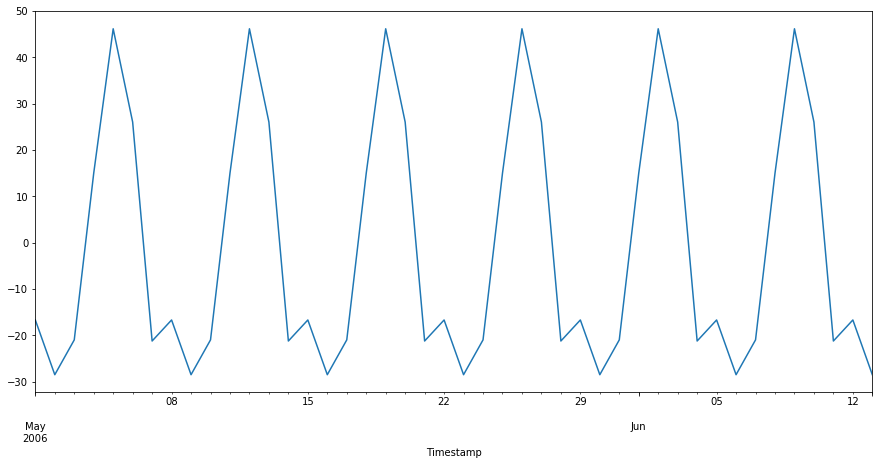

In [21]:
Seasonal.loc['2006-05':'2006-8'].plot(figsize=(15,7))

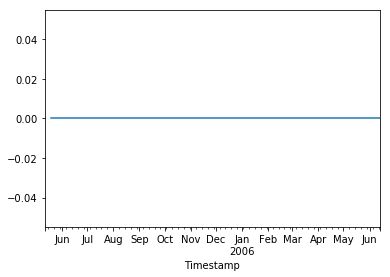

In [24]:
(Seasonal - Seasonal.shift(7)).plot()

the period of the seasonality is 7 days

# TS_dep42.csv:

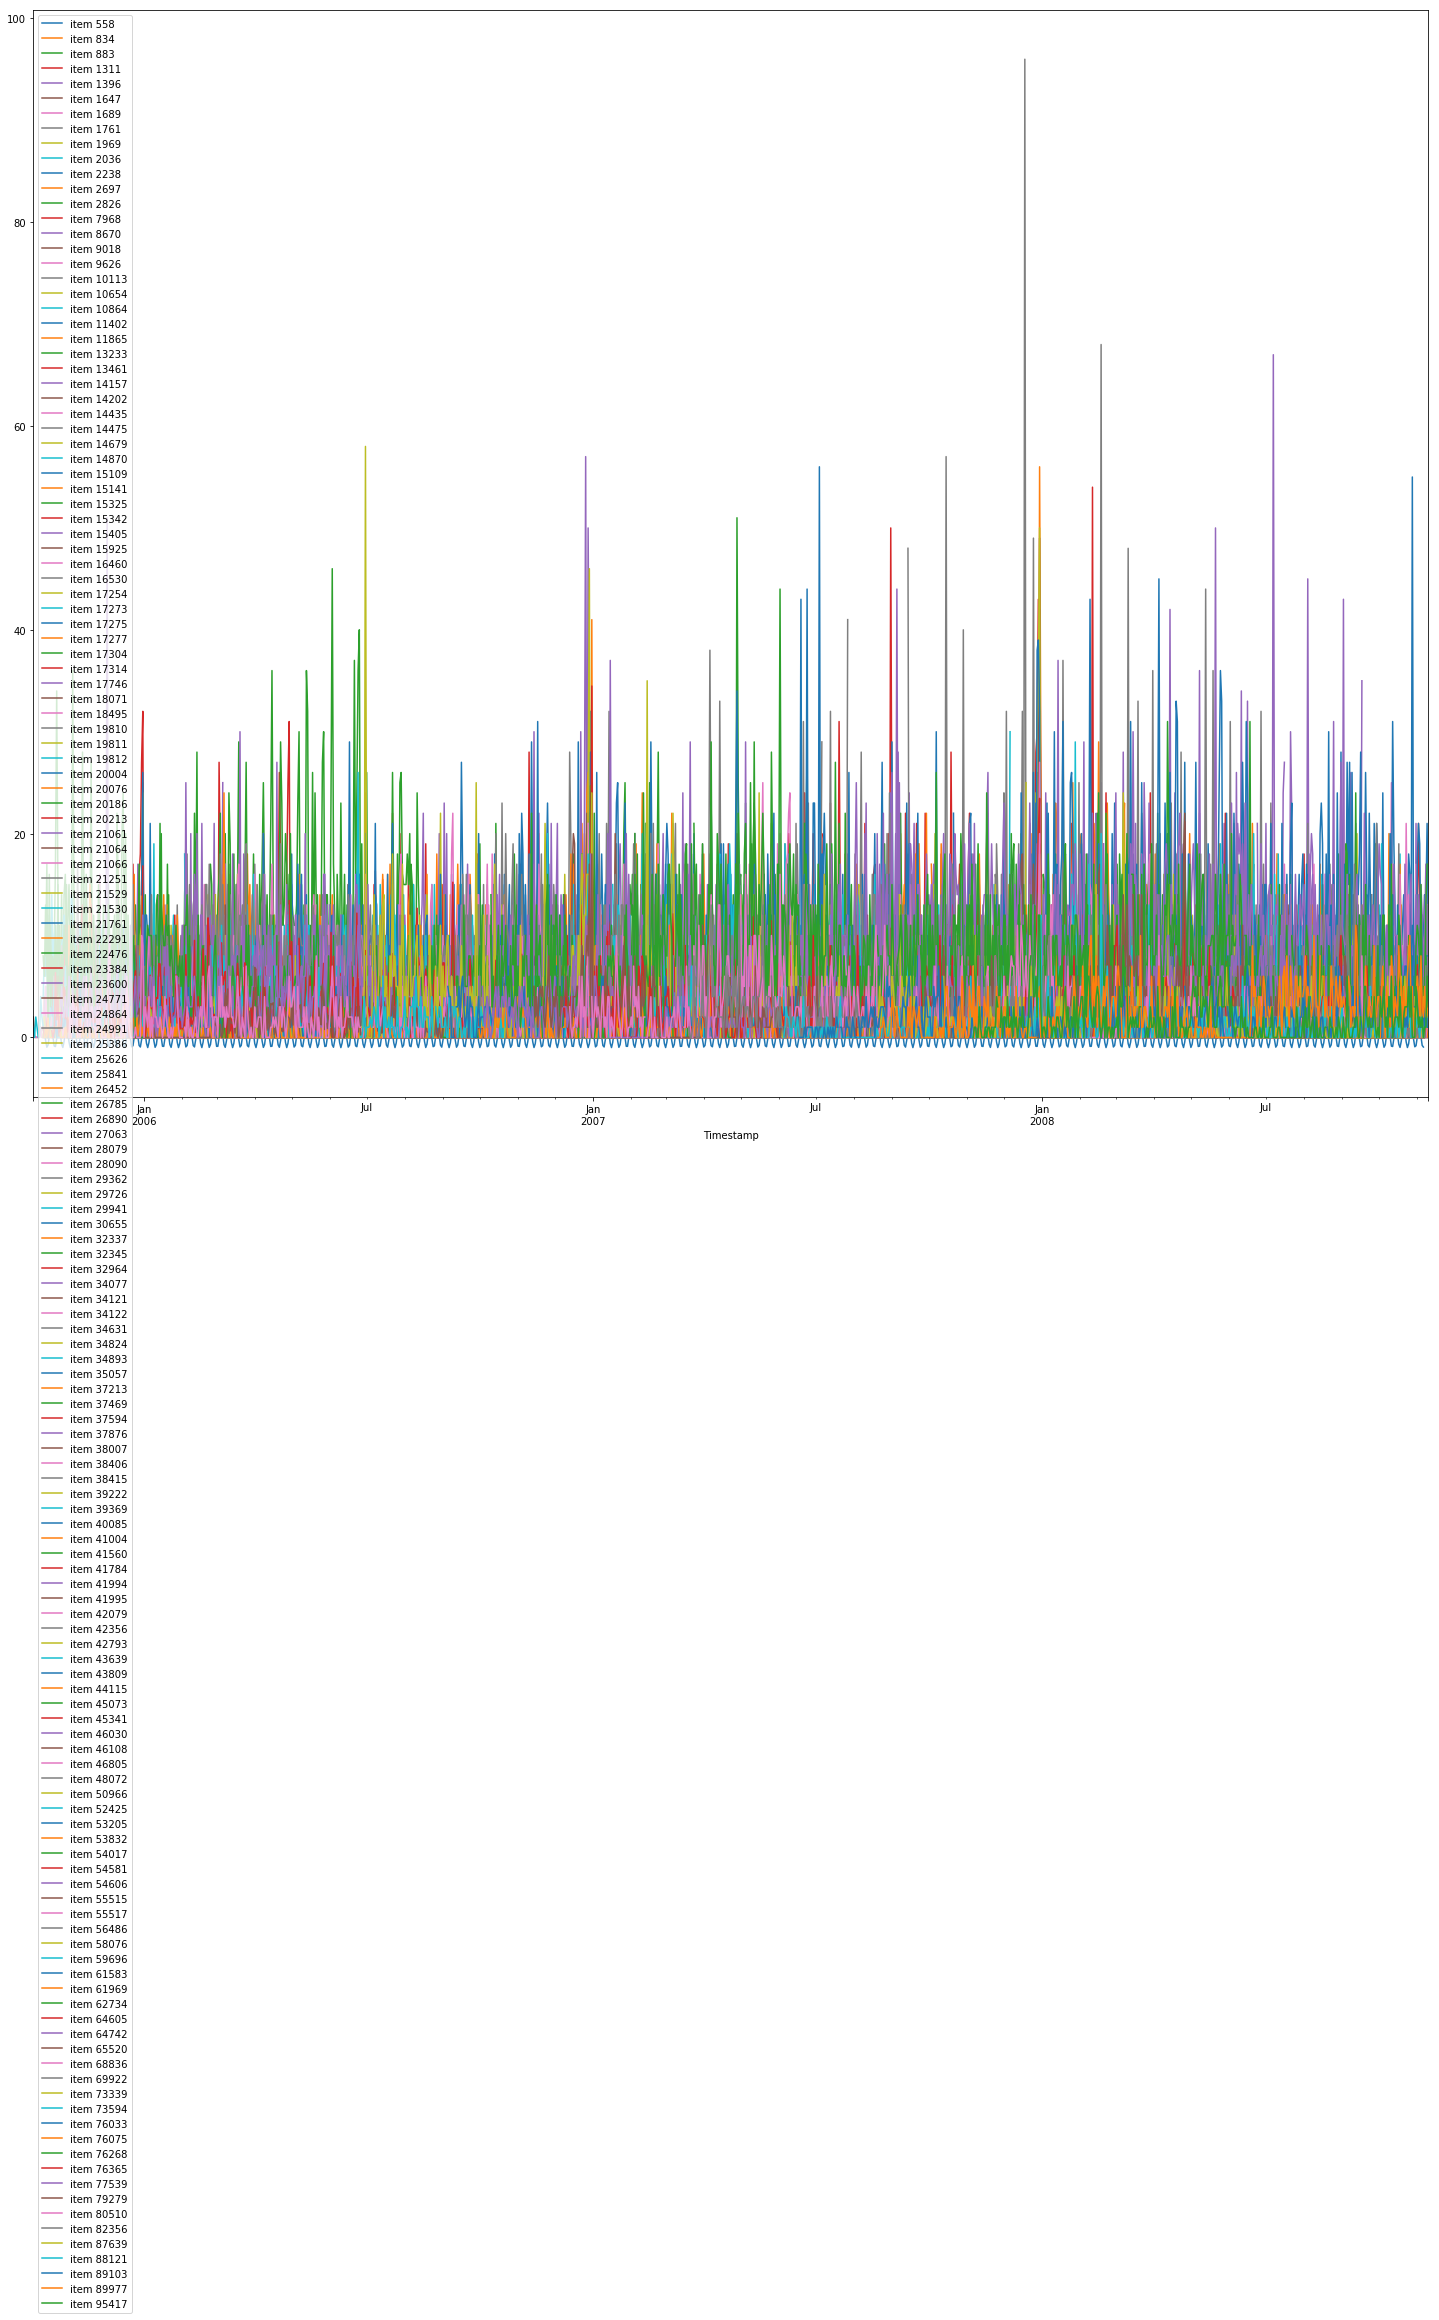

In [25]:
ts = pd.read_csv('./data/TS_dep42.csv', sep=';', decimal='.', index_col= 'Timestamp', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(25,20))

Let's aggregate the data:

In [26]:
ts_sum = pd.DataFrame(ts.sum(axis=1), columns = ['data'])

In [27]:
ts_sum.head()

data
Timestamp       
2005-10-03   4.0
2005-10-04   0.0
2005-10-05   2.0
2005-10-06   1.0
2005-10-07   0.0

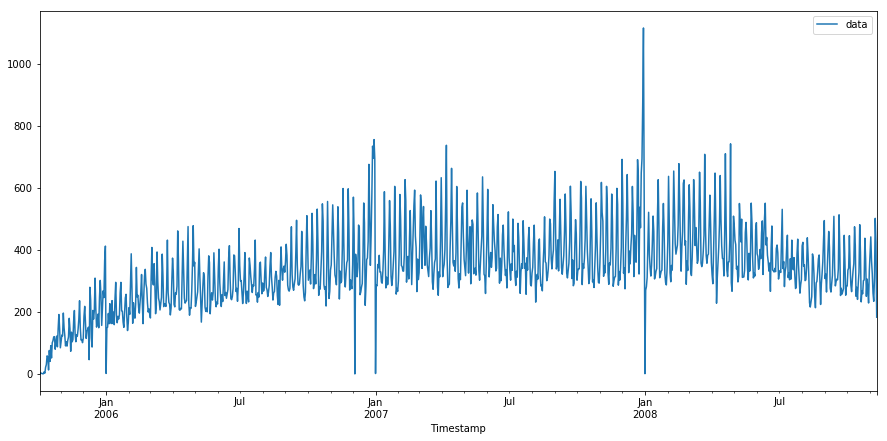

In [28]:
ts_sum.plot(figsize=(15,7))

There is an increasing trend which is obvious in the beginning of the plot of time series, then there is also a decresing trend starting from May 2008. There isn't an obvious seasonality (we will check it later too). The level of TS is almost not changeing (if we didn't consider the first increasing trend and the last deacrisng trend).

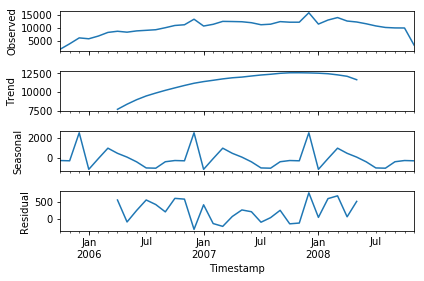

In [29]:
res = sm.tsa.seasonal_decompose(ts_sum['data'].resample("M").sum())
resplot = res.plot()

From the decompoite graph we can see a seasonality in the TS, and also the incresing trend (but not the decreasing one). The period of the seasonality is 1 year (from july 2006, until july 2007) so it is 12.

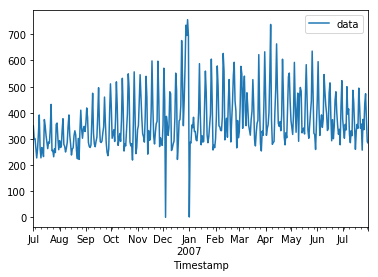

In [30]:
ts_sum['2006-07':'2007-07'].plot()

#  TS_dep6.csv:

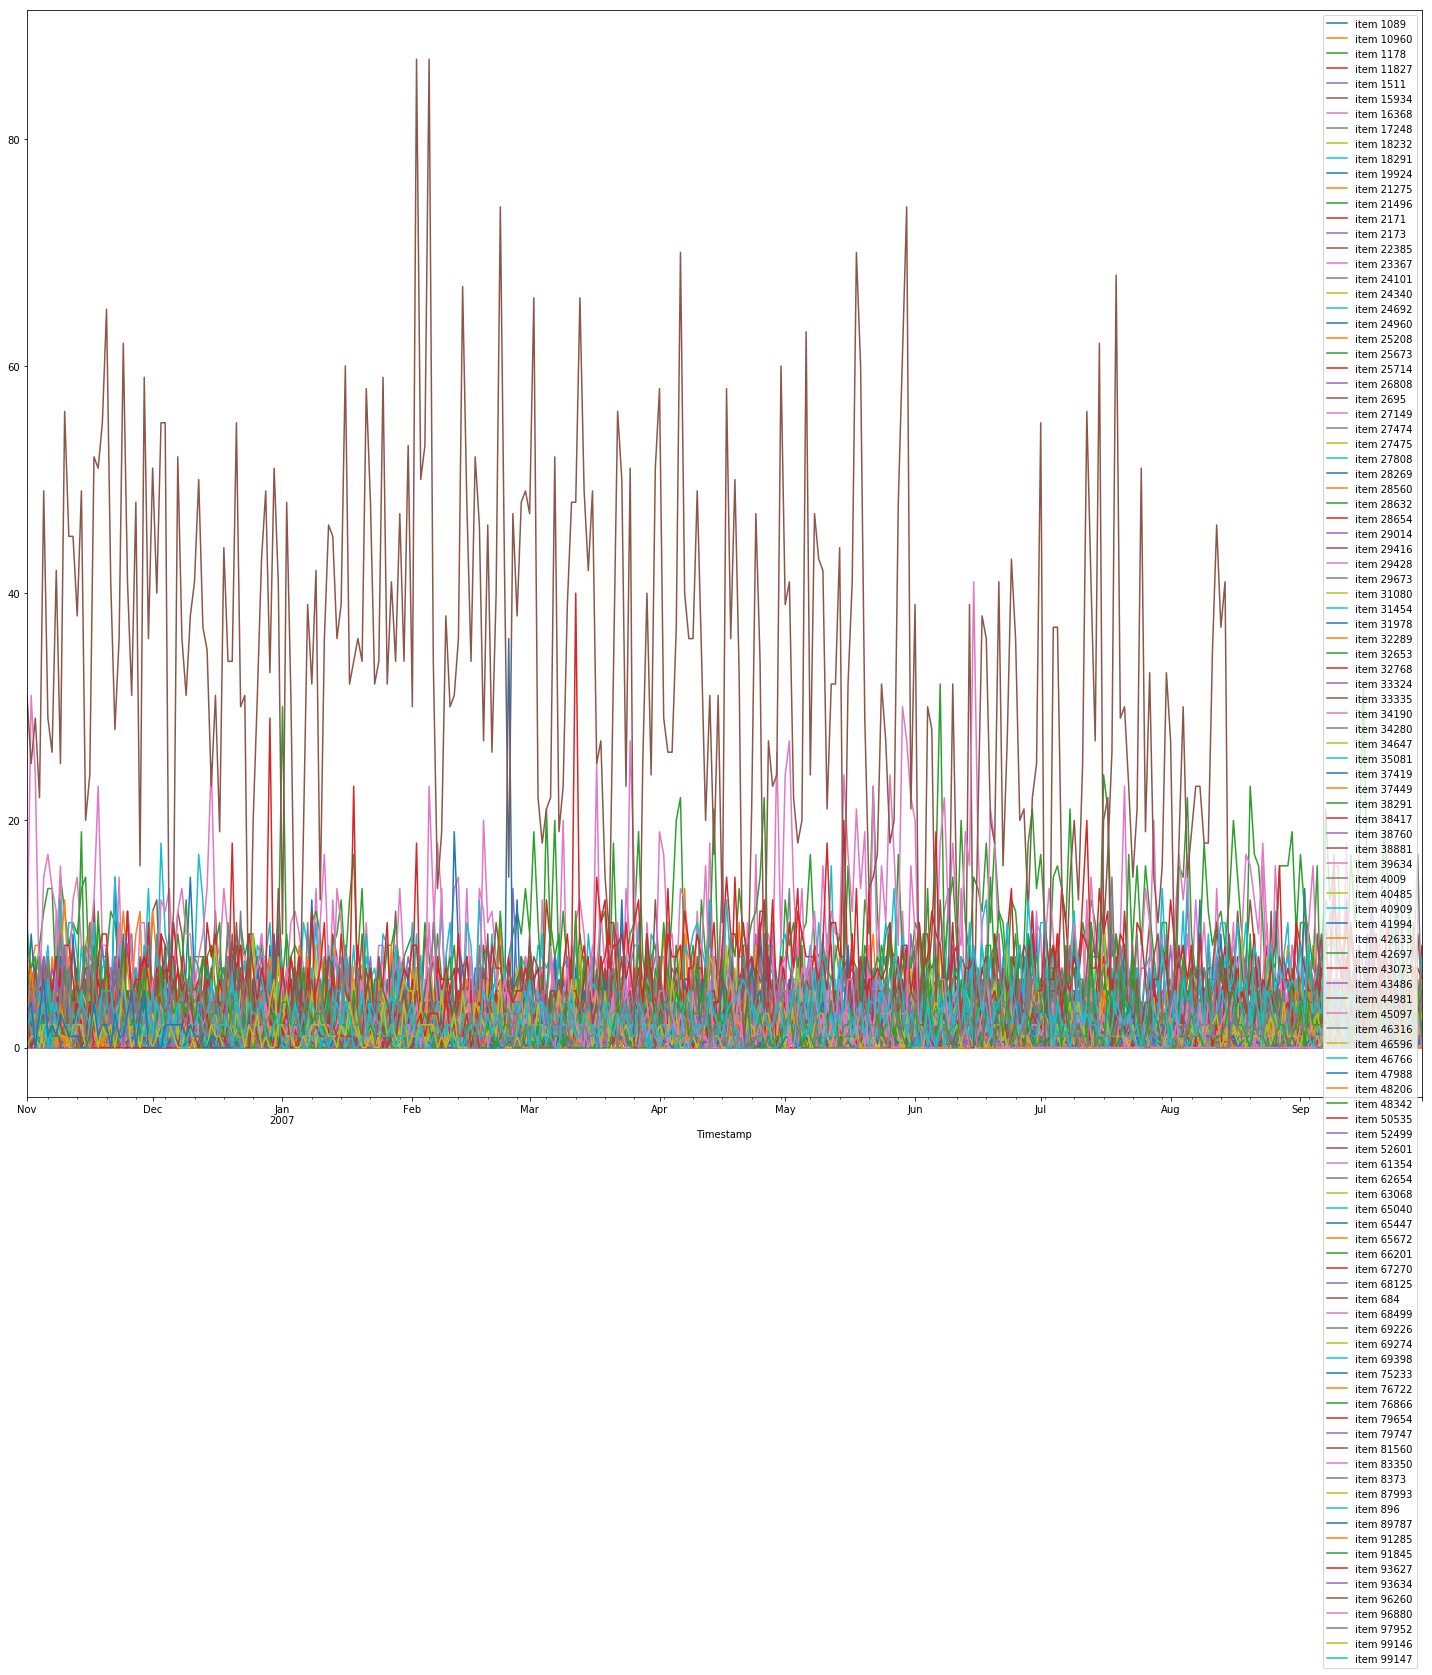

In [21]:
ts = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col= 'Timestamp', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(25,20))

In [22]:
ts.head(3)

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2006-11-01        1.0         2.0        0.0         3.0        3.0   
2006-11-02        2.0         2.0        4.0         0.0        0.0   
2006-11-03        4.0         4.0        1.0         3.0        3.0   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
Timestamp                                                                
2006-11-01         0.0         0.0         2.0         3.0         4.0   
2006-11-02         1.0         0.0         5.0         1.0         6.0   
2006-11-03         1.0         0.0         5.0         6.0         7.0   

               ...      item 89787  item 91285  item 91845  item 93627  \
Timestamp      ...                                                       
2006-11-01     ...             3.0         NaN         NaN         NaN   
2006-11-02     ...             4.0         NaN         NaN         NaN   
2006-11-03     ...             0.0         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
Timestamp                                                                
2006-11-01         NaN         NaN         NaN         NaN         NaN   
2006-11-02         NaN         NaN         NaN         NaN         NaN   
2006-11-03         NaN         NaN         NaN         NaN         NaN   

            item 99147  
Timestamp               
2006-11-01         NaN  
2006-11-02         NaN  
2006-11-03         NaN  

[3 rows x 110 columns]

In [23]:
ts_sum = pd.DataFrame(ts.sum(axis=1), columns = ['data'])

In [24]:
ts_sum.head(3)

data
Timestamp          
2006-11-01  228.967
2006-11-02  274.494
2006-11-03  276.026

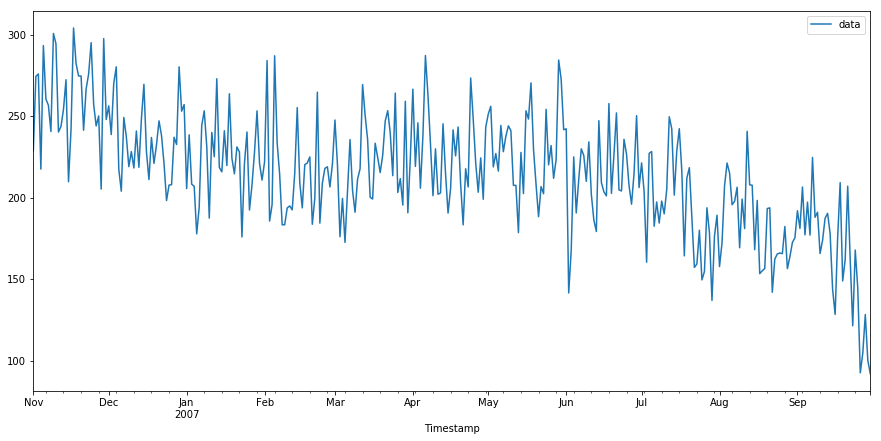

In [25]:
ts_sum.plot(figsize = (15,7))

There is a decreasing trend in the TS. There is no an obious seasonality (we will check it later). There are some changes in the level of TS.

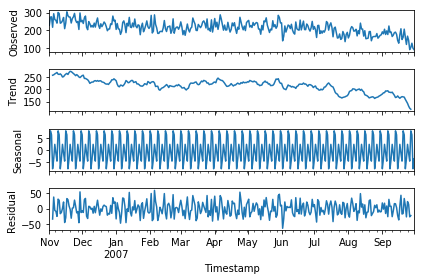

In [26]:
tt = ts_sum.dropna()
res = sm.tsa.seasonal_decompose(tt['data'].resample("D").sum())
resplot = res.plot()

There is a seasonality, the period is 7, there is a decreasing trend.

------

<h1 align="center">2. Apply Simple ES to data with trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

In [31]:
ts = pd.read_csv('./data/mothly_wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)

In [32]:
ts_train=ts.loc['1998-09':'2015-01']
ts_test = ts.loc['1998-09':'2017-01']

### Loss

In [33]:
def qualityRMSE(x,y):
    # Root mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (((x-y)**2).mean())**(0.5) , (x-y)**2

In [34]:
def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

###  -1-


alpha: 0.23 loss: 16.3279587438


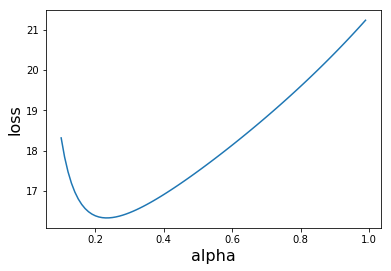

In [35]:
h = 1
start = ts_train.index[-1]+timedelta(1)
end = ts_train.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_1 = pd.DataFrame(index = ts_train.index.append(rng), columns = ts_train.columns)

min_loss = math.inf
min_alpha = 10

plot_loss = []

ALPHA = np.arange(0.1,1,0.01)
for alpha in ALPHA:
    # ES params
    Params ={'alpha':alpha}
    # forecast
    for cntr in ts_train.columns:
        x = ts_train[cntr]
        frc_ts_1[cntr] = SimpleExponentialSmoothing(x, h, Params)
        
    Quality, _ = qualityRMSE(ts_train, frc_ts_1)
    plot_loss.append(Quality[0])
    
    if(Quality[0] < min_loss ):
        min_loss = Quality[0]
        min_alpha = alpha
    #print('alpha:',alpha, ' loss:', Quality[0])

plt.plot(ALPHA, plot_loss)
plt.xlabel('alpha', fontsize = 16)
plt.ylabel('loss', fontsize = 16)
print()
print('alpha:' , min_alpha , 'loss:', min_loss)

Best alpha is 0.23, which is close to 0

### -2-

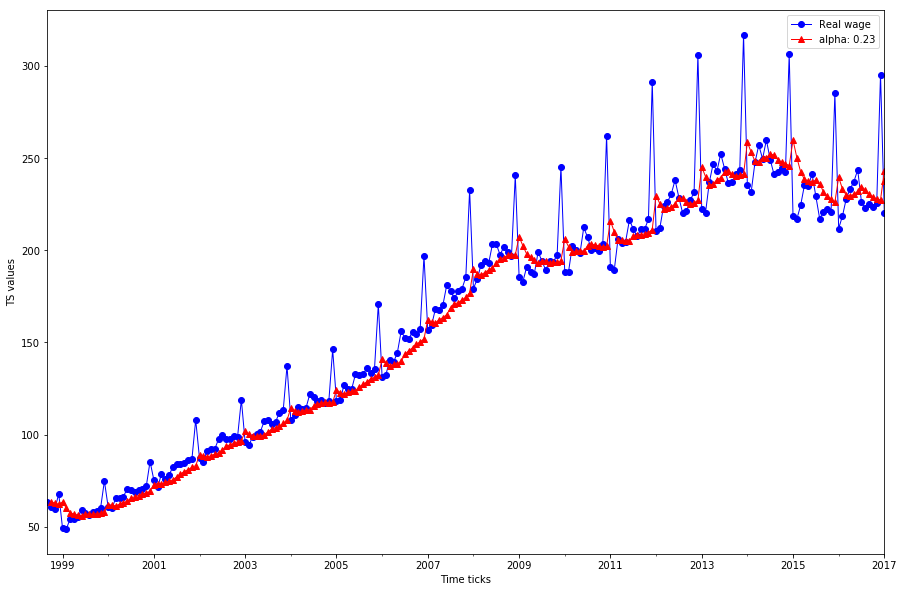

In [36]:
h = 1
start = ts_test.index[-1]+timedelta(1)
end = ts_test.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts_test.index.append(rng), columns = ts_test.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params ={'alpha':min_alpha}

# forecast
for cntr in ts_test.columns:
    x = ts_test[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(min_alpha))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

 SES cannot be used for this TS, because TS has seasonality and trend which are not being considered by this method

### -3-

In [37]:
ts_2 = ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
frc_ts_2=frc_ts[ frc_ts.columns[ts_num] ].loc['2016-02':'2017-01']

Quality, _ = qualityRMSE(ts_2, frc_ts_2)
print(Quality)

21.958896660497928


### -4-

In [38]:
ts_year = ts.resample("12M").mean()
ts_year_train =ts_year.loc['1998':'2015']
ts_year_test =ts_year.loc['1998':'2017']

#### -1-

In [39]:
h = 1

start = ts_year_train.index[-1]+timedelta(1)
end = ts_year_train.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_1 = pd.DataFrame(index = ts_year_train.index.append(rng), columns = ts_year_train.columns)

min_loss = math.inf
min_alpha = 10

ALPHA = np.arange(0.1,1,0.01)
for alpha in ALPHA:
    # ES params
    Params ={'alpha':alpha}
    # forecast
    for cntr in ts_year_train.columns:
        x = ts_year_train[cntr]
        frc_ts_1[cntr] = SimpleExponentialSmoothing(x, h, Params)
        
    Quality, _ = qualityRMSE(ts_year_train, frc_ts_1)
    
    if(Quality[0] < min_loss ):
        min_loss = Quality[0]
        min_alpha = alpha
    #print('alpha:',alpha, ' loss:', Quality[0])
    
print()
print('alpha:' , min_alpha , 'loss:', min_loss)


alpha: 0.99 loss: 14.5738190728


The optimal value for alpha is 0.99 which is close to 1

#### -2-

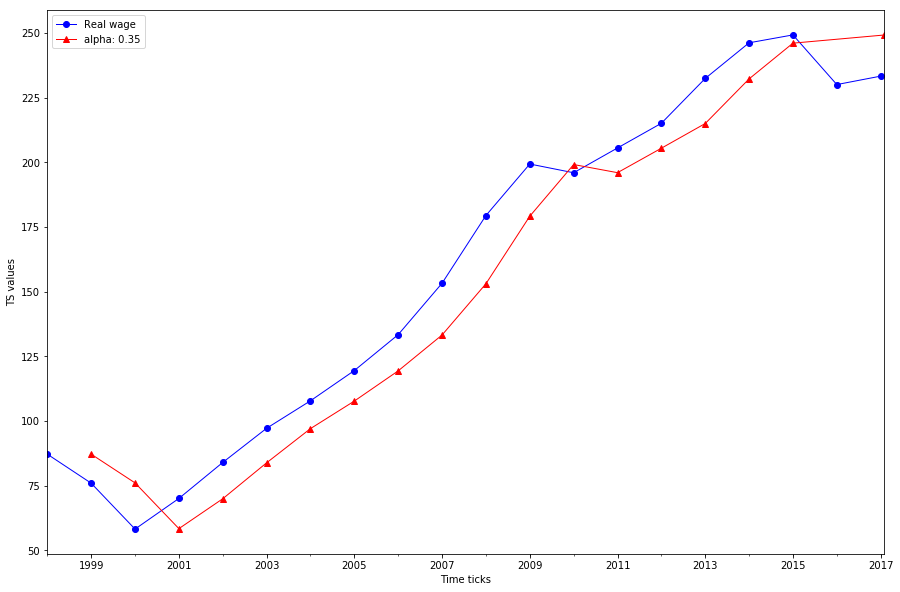

In [40]:
h = 1
start = ts_year.index[-1]+timedelta(1)
end = ts_year.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts_year_train.index.append(rng), columns = ts_year_train.columns)

ts_year.loc['1998':'2017'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params ={'alpha':min_alpha}

# forecast
for cntr in ts.columns:
    x = ts_year_train[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998':'2017'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.35))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

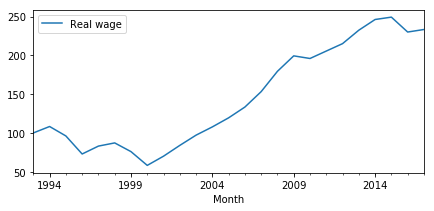

In [41]:
ts_year.plot(figsize = (7,3))

We still have a trend, but we don't have a seasonality. I would say that SES shouldn't be used for this TS as the trend is not being considered.

-----

<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

### -1-

In [76]:
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma= Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= 0               # initialize ts level 
    s= [np.NaN]*(p)    # initalize seasonality values (it must be vector of lenth p)
    s[0] = x[0]
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]# initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]-l# TODO: itinilize 
             
            s_saved = s[cntr % p]
            s[cntr % p] = gamma* (x[cntr] - l ) + (1 -gamma) * s[cntr % p] # recurrent smoothing of seasonality
            l = alpha * (x[cntr] - s_saved) + (1- alpha) * l             # recurrent smoothing of level 
            
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST

### -2-

In [77]:
h = 1

start = ts_train.index[-1]+timedelta(1)
end = ts_train.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts_train.index.append(rng), columns = ts_train.columns)

ALPHA = np.arange(0.1, 1, 0.01)

min_loss= math.inf
min_gamma= 0
min_alpha = 0
plot_loss = []

for alpha in ALPHA:
    for gamma in ALPHA:
    # ES params
        Params={'alpha':alpha, 'gamma':gamma, 'seasonality_period':12}
        # forecast
        for cntr in ts_train.columns:
            x = np.array(ts_train[cntr])
            frc_ts[cntr] = WintersExponentialSmoothing(x, h, Params)
        
        Quality, _ = qualityRMSE(ts, frc_ts)
        plot_loss.append(Quality[0])
        
        if(min_loss > Quality[0]):
            min_loss = Quality[0]
            min_gamma=gamma
            min_alpha = alpha
        #print('alpha:', alpha,'gamma:',gamma,'loss:',  Quality[0])
        
print()
print('alpha:', min_alpha,'gamma:', min_gamma,'loss:', min_loss)


alpha: 0.85 gamma: 0.64 loss: 4.17249912391


Optimal value for:

alpha: 0.85 

gamma: 0.64
        
loss: 4.17249912391

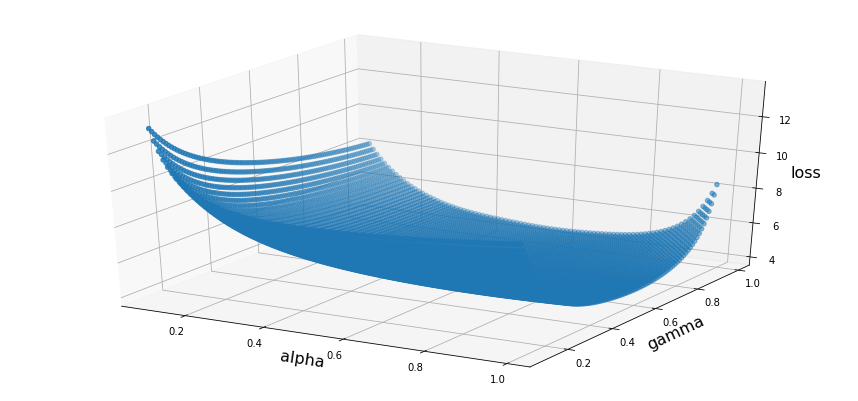

In [78]:
from mpl_toolkits.mplot3d import Axes3D
import itertools

x = y = np.arange(0.1, 1, 0.01)
xy = list(itertools.product(x, y))
x = [item[0] for item in xy]
y = [item[1] for item in xy]

fig = plt.figure(figsize=(15,7))
ax = fig.gca(projection='3d')

ax.scatter(x, y, plot_loss, zdir='z', c=None, depthshade=True)
ax.set_xlabel('alpha', fontsize = 16)
ax.set_ylabel('gamma', fontsize = 16)
ax.set_zlabel('loss', fontsize = 16)

### -3-

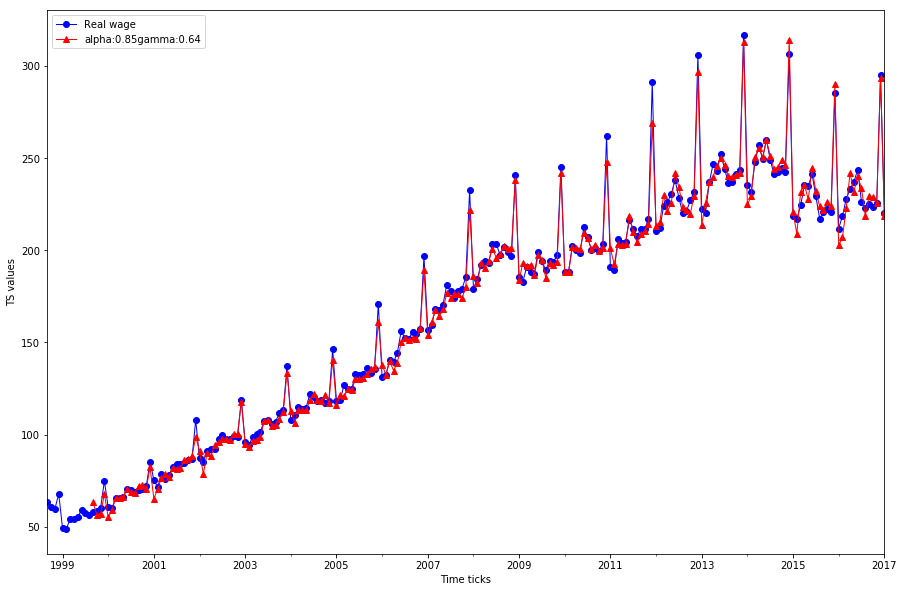

In [79]:
h = 1
start = ts_test.index[-1]+timedelta(1)
end = ts_test.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts_test.index.append(rng), columns = ts_test.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params={'alpha':min_alpha, 'gamma':min_gamma, 'seasonality_period':12}

# forecast
for cntr in ts_test.columns:
    x = ts_test[cntr]
    frc_ts[cntr] = WintersExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha:'+str(min_alpha)+ 'gamma:' + str(min_gamma))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

### -4-

In [80]:
ts_2 = ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
frc_ts_2=frc_ts[ frc_ts.columns[ts_num] ].loc['2016-02':'2017-01']

Quality, _ = qualityRMSE(ts_2, frc_ts_2)
print(Quality)

5.752509548982845


loss of SES:           21.958

loss of Winter's ES: 5.752

Comparing the Accuracy (the loss), Winter's model is doing 4 times better than SES.

### -5-

If we only have two choices, SES or Winter's ES, of course we would choose Winter's ES for this TS. As Winter's ES is considering the seasonality of our data wherease SES is not. However, we need some model that consider both seasonality and trend of the TS. 

-----

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

### -1-

In [61]:
###################### Theil Wage Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma<scalar in [0,1]> - seasonality smoothing parameter
#    beta <scalar in [0,1]> - trend smoothing parameter

def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma= Params['gamma']
    
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    b= 0
    l= 0               # initialize ts level 
    s= [np.NaN]*(p)    # initalize seasonality values (it must be vector of lenth p)
    s[0] = x[0]
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]# initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]-l# TODO: itinilize 
            
            if math.isnan(b):
                b= x[cntr]# initialize 
               
            l_saved = l
            s_saved = s[cntr % p]
            
            l = alpha * (x[cntr] - s[cntr % p]) + (1- alpha) * (l + b)            # recurrent smoothing of level 
            b = beta * (l - l_saved) + (1 - beta) * b                             # recurrent smoothing of trend
            s[cntr % p] = gamma* (x[cntr] - l ) + (1 - gamma) * s[cntr % p] # recurrent smoothing of seasonality
            
            
        FORECAST[cntr+h] = l + b*h + s[(cntr+h) % p]
    return FORECAST

### -2-

In [62]:
h = 1

ts1 = ts_train.loc[:'2015-01']
start = ts_train.index[-1]+timedelta(1)
end = ts_train.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts_train.index.append(rng), columns = ts_train.columns)

ALPHA = np.arange(0.1, 1, 0.05)

min_loss= math.inf
min_beta = 0
min_alpha = 0
min_gamma= 0

for alpha in ALPHA:
    for beta in ALPHA:
        for gamma in ALPHA:
            Params={'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':12}
            for cntr in ts_train.columns:
                x = np.array(ts_train[cntr])
                frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)
            

            Quality, _ = qualityRMSE(ts_train , frc_ts)

            if(min_loss > Quality[0]):
                min_loss = Quality[0]
                min_beta = beta
                min_alpha = alpha
                min_gamma=gamma
            #print('alpha:', alpha,'beta:', beta, 'gamma:', gamma,'loss:',  Quality[0])
        
print()
print('alpha:', min_alpha,'beta:', min_beta, 'gamma:',gamma, 'loss:',  min_loss)


alpha: 0.4 beta: 0.1 gamma: 0.95 loss: 4.45807595296


alpha: 0.4

beta: 0.1 

gamma: 0.95

loss: 4.45807595296

### -3-

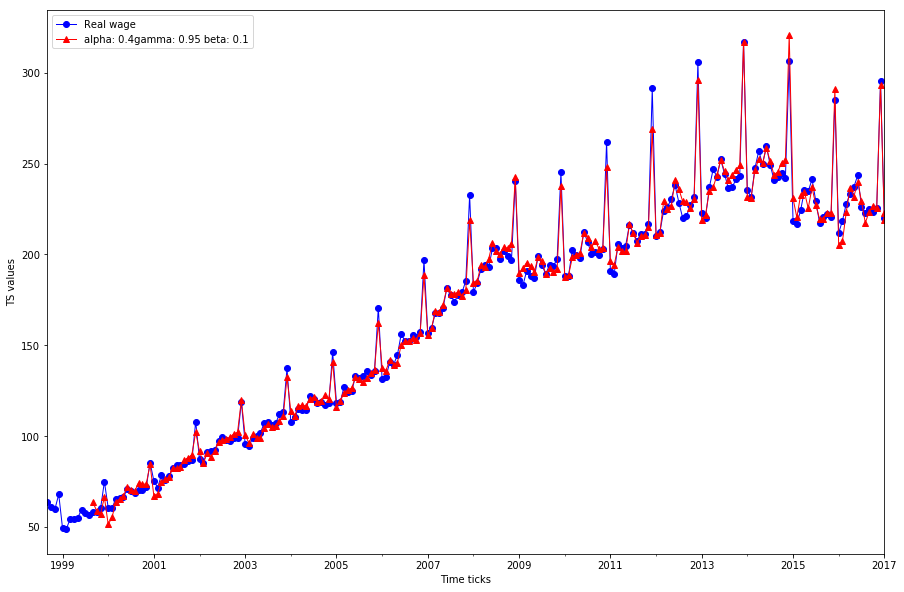

In [63]:
h = 1
start = ts_test.index[-1]+timedelta(1)
end = ts_test.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts_test.index.append(rng), columns = ts_test.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params={'alpha': min_alpha, 'beta': min_beta, 'gamma': min_gamma, 'seasonality_period':12}

# forecast
for cntr in ts_test.columns:
    x = ts_test[cntr]
    frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(min_alpha) + 'gamma: '+ str(min_gamma) + ' beta: '+ str(min_beta))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

### -4-

In [64]:
ts_2 = ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
frc_ts_2=frc_ts[ frc_ts.columns[ts_num] ].loc['2016-02':'2017-01']

Quality, _ = qualityRMSE(ts_2, frc_ts_2)
print(Quality)

4.6255472372370905


Loss of SES:           21.958

Loss of Winter's ES: 5.752

Loss of Theil Wage ES: 4.625

Comparing the Accuracy (the loss),Theil Wage model is doing better than Winter's ES (but not much) and is doing much better than SES. SES is doing the worst.

### -5-

Theil-Wage model can be improved by considering multiplicative trend with additive seasonality, or multiplicative seasonality with additive trend. 

### -6- 
check for unstable 

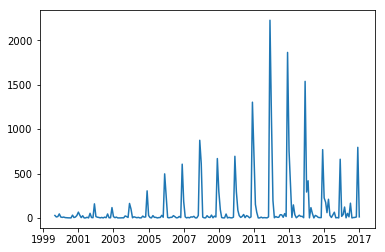

In [81]:
h = 1
Params={'alpha':min_alpha, 'beta':min_beta, 'gamma': min_gamma, 'seasonality_period':12}
for cntr in ts_test.columns:
    x = ts_test[cntr]
    frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    
_, loss_additive = qualityRMSE(ts, frc_ts)

plt.plot(loss_additive)

In [82]:
min_alpha_add = min_alpha
min_gamma_add = min_gamma
min_beta_add = min_beta

-----

<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

### -1-

In [83]:
##ESM(M, A) Multplicative trend, with additive seasonality

# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma<scalar in [0,1]> - seasonality smoothing parameter
#    beta <scalar in [0,1]> - trend smoothing parameter

def ESM(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma= Params['gamma']
    
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    b= 0
    l= 0               # initialize ts level 
    s= [np.NaN]*(p)    # initalize seasonality values (it must be vector of lenth p)
    s[0] = x[0]
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]# initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]-l# TODO: itinilize 
            
            if math.isnan(b):
                b= x[cntr]# initialize 
               
            l_saved = l
            s_saved = s[cntr % p]
            
            l = alpha * (x[cntr] - s[cntr % p]) + (1- alpha) * (l + b)            # recurrent smoothing of level 
            b = beta * (l /( l_saved* (l_saved!=0)+ 0.1*(l_saved == 0)))+(1 - beta)*b   #recurrent smoothing of trend
            s[cntr % p] = gamma* (x[cntr] - l ) + (1 -gamma) * s[cntr % p] # recurrent smoothing of seasonality
            
            
        FORECAST[cntr+h] = l * b * h + s[(cntr+h) % p]
    return FORECAST

### -2-

In [84]:
h = 1

start = ts_train.index[-1]+timedelta(1)
end = ts_train.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
ts1 = ts.loc[:'2015-01']
frc_ts = pd.DataFrame(index = ts_train.index.append(rng), columns = ts_train.columns)

ALPHA = np.arange(0.1, 1, 0.05)

min_loss= math.inf
min_beta = 0
min_alpha = 0
min_gamma= 0

for alpha in ALPHA:
    for beta in ALPHA:
        for gamma in ALPHA:
            Params={'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':12}
            for cntr in ts_train.columns:
                x = np.array(ts_train[cntr])
                frc_ts[cntr] = ESM(x, h, Params)
            

            Quality, _ = qualityRMSE(ts_train , frc_ts)

            if(min_loss > Quality[0]):
                min_loss = Quality[0]
                min_beta = beta
                min_alpha = alpha
                min_gamma=gamma
            #print('alpha:', alpha,'beta:', beta, 'gamma:', gamma,'loss:',  Quality[0])
        
print()
print('alpha:', min_alpha,'beta:', min_beta, 'gamma:',gamma, 'loss:',  min_loss)


alpha: 0.3 beta: 0.3 gamma: 0.95 loss: 4.57349846282


Optimal value for:

alpha: 0.3

beta: 0.3
    
gamma: 0.95
    
loss: 4.57349846282

### -3-

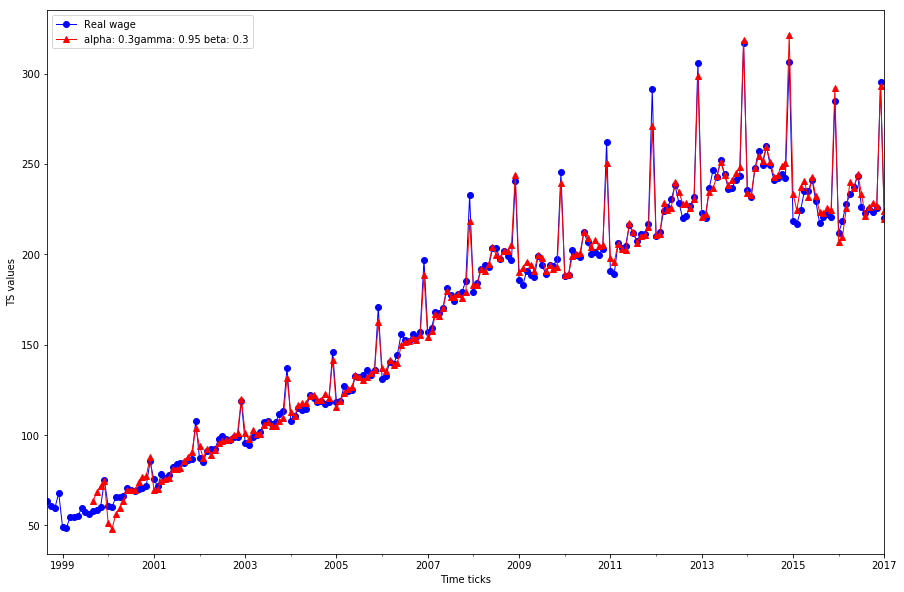

In [85]:
h = 1
start = ts_test.index[-1]+timedelta(1)
end = ts_test.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts_test.index.append(rng), columns = ts_test.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params={'alpha':min_alpha, 'beta':min_beta, 'gamma': min_gamma, 'seasonality_period':12}

# forecast
for cntr in ts_test.columns:
    x = ts_test[cntr]
    frc_ts[cntr] = ESM(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(min_alpha)+'gamma: '+ str(min_gamma) + ' beta: '+ str(min_beta))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

### -4-

In [86]:
ts_2 = ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
frc_ts_2=frc_ts[ frc_ts.columns[ts_num] ].loc['2016-02':'2017-01']

Quality, _ = qualityRMSE(ts_2, frc_ts_2)
print(Quality)

4.288777669648635


Loss of SES:           21.958

Loss of Winter's ES: 5.752

Loss of Theil Wage ES: 4.625

loss of ESM(M,A): 4.288




Comparing the Accuracy (the loss), ESM(M, A) model is doing better than SES, Theil Wage ES and Winter's ES. SES is doing the worst.

### -5-

In [92]:
min_alpha_mult = min_alpha
min_gamma_mult = min_gamma
min_beta_mult = min_beta

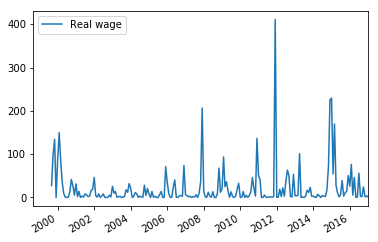

In [93]:
Params={'alpha':min_alpha, 'beta':min_beta, 'gamma': min_gamma, 'seasonality_period':12}
for cntr in ts_test.columns:
    x = ts_test[cntr]
    frc_ts[cntr] = ESM(x, h, Params)
    
_, loss_mult = qualityRMSE(ts_test , frc_ts)

loss_mult.plot()

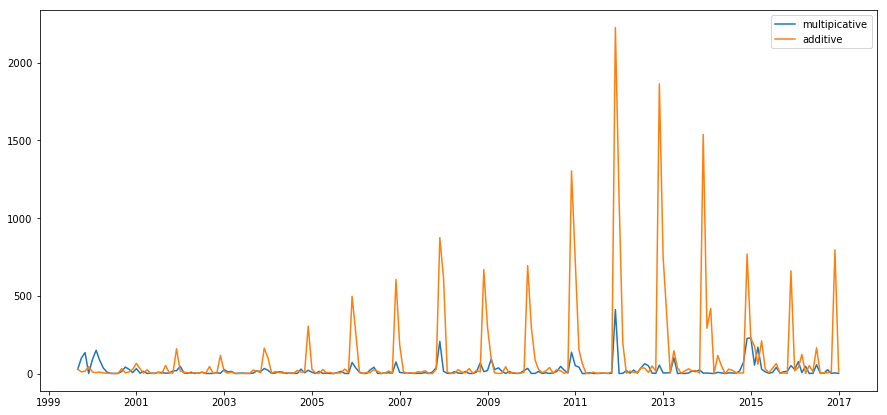

In [94]:
plt.figure(figsize =(15,7))

plt.plot(loss_mult, label = 'multipicative')
plt.plot(loss_additive,  label = 'additive')
plt.legend(fontsize = 10)

Let's make a small changes to our optimal values of alpha, beta and see if the forecast will be unstable 

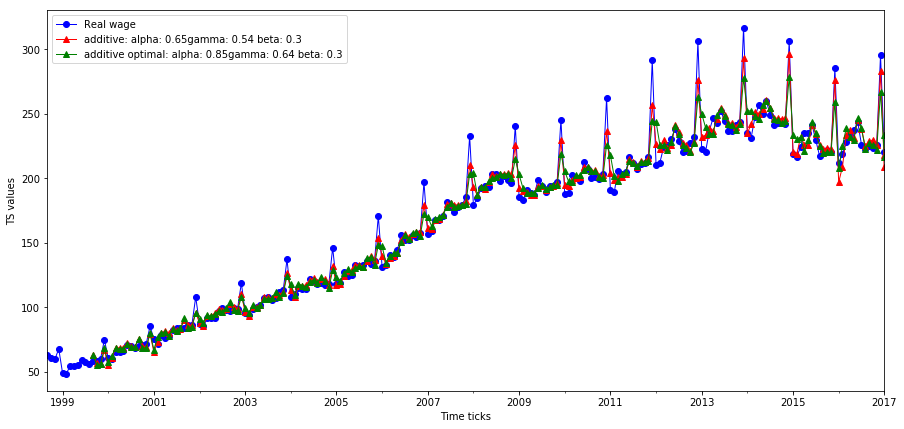

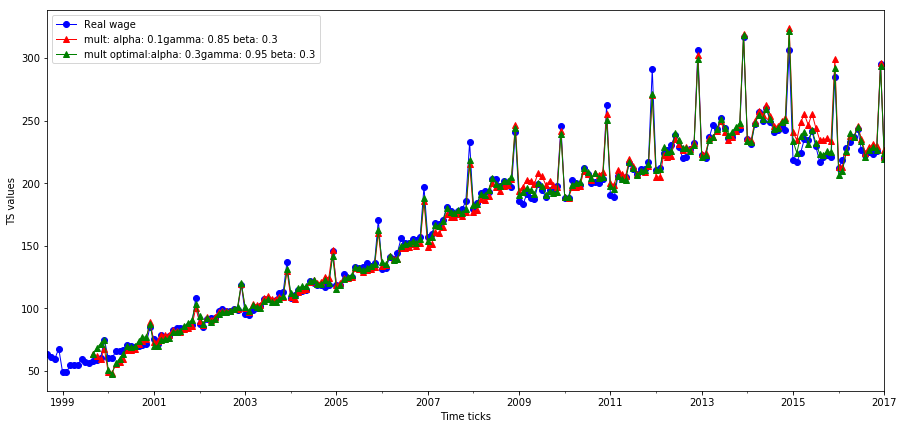

In [95]:
h = 1
start = ts_test.index[-1]+timedelta(1)
end = ts_test.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_additive= pd.DataFrame(index = ts_test.index.append(rng), columns = ts_test.columns)
frc_ts_additive_optimal= pd.DataFrame(index = ts_test.index.append(rng), columns = ts_test.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

min_alpha_add_c = min_alpha_add - 0.2
min_beta_add_c = min_beta_add 
min_gamma_add_c = min_gamma_add -0.1

Params={'alpha': min_alpha_add_c, 'beta': min_beta_add_c, 'gamma':min_gamma_add_c, 'seasonality_period':12}
Params_optimal = {'alpha': min_alpha_add, 'beta': min_beta_add, 'gamma':min_gamma_add, 'seasonality_period':12}

# forecast
for cntr in ts_test.columns:
    x = ts_test[cntr]
    frc_ts_additive[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    frc_ts_additive_optimal[cntr] = TheilWageExponentialSmoothing(x, h, Params_optimal)
    
# Example: draw of ts and it's forecast 
ts_num=0
frc_ts_additive[frc_ts_additive.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,7), linewidth=1.0, label='additive: alpha: '+str(min_alpha_add_c) + 'gamma: '+ str(min_gamma_add_c) + ' beta: '+ str(min_beta_add_c))
frc_ts_additive_optimal[frc_ts_additive.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='g-^', figsize=(15,7), linewidth=1.0, label='additive optimal: alpha: '+str(min_alpha_add) + 'gamma: '+ str(min_gamma_add) + ' beta: '+ str(min_beta_add))
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()
    
    
    
    
h = 1
start = ts_test.index[-1]+timedelta(1)
end = ts_test.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_mult= pd.DataFrame(index = ts_test.index.append(rng), columns = ts_test.columns)
frc_ts_mult_optimal= pd.DataFrame(index = ts_test.index.append(rng), columns = ts_test.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
min_alpha_c = min_alpha_mult - 0.2
min_beta_c = min_beta_mult 
min_gamma_c = min_gamma_mult - 0.1

Params={'alpha':min_alpha_c, 'beta':min_beta_c, 'gamma': min_gamma_c, 'seasonality_period':12}
Params_optimal={'alpha':min_alpha_mult, 'beta':min_beta_mult, 'gamma': min_gamma_mult, 'seasonality_period':12}

# forecast
for cntr in ts_test.columns:
    x = ts_test[cntr]
    frc_ts_mult[cntr] = ESM(x, h, Params)
    frc_ts_mult_optimal[cntr] = ESM(x, h, Params_optimal)
# Example: draw of ts and it's forecast 
ts_num=0
frc_ts_mult[frc_ts_mult.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,7), linewidth=1.0, label='mult: alpha: '+str(min_alpha_c)+'gamma: '+ str(min_gamma_c) + ' beta: '+ str(min_beta_c))
frc_ts_mult_optimal[frc_ts_mult_optimal.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='g-^', figsize=(15,7), linewidth=1.0, label='mult optimal:alpha: '+str(min_alpha)+'gamma: '+ str(min_gamma) + ' beta: '+ str(min_beta))

plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

### We can see from the graph that:

It is true that multiplicative model is more unstable than additive. As we can see from the multiplicative graph making small changes to the parameters is resulting in divergence in the forecast (the red line)

---------

# THE END

------

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

<h1 align="center"> I

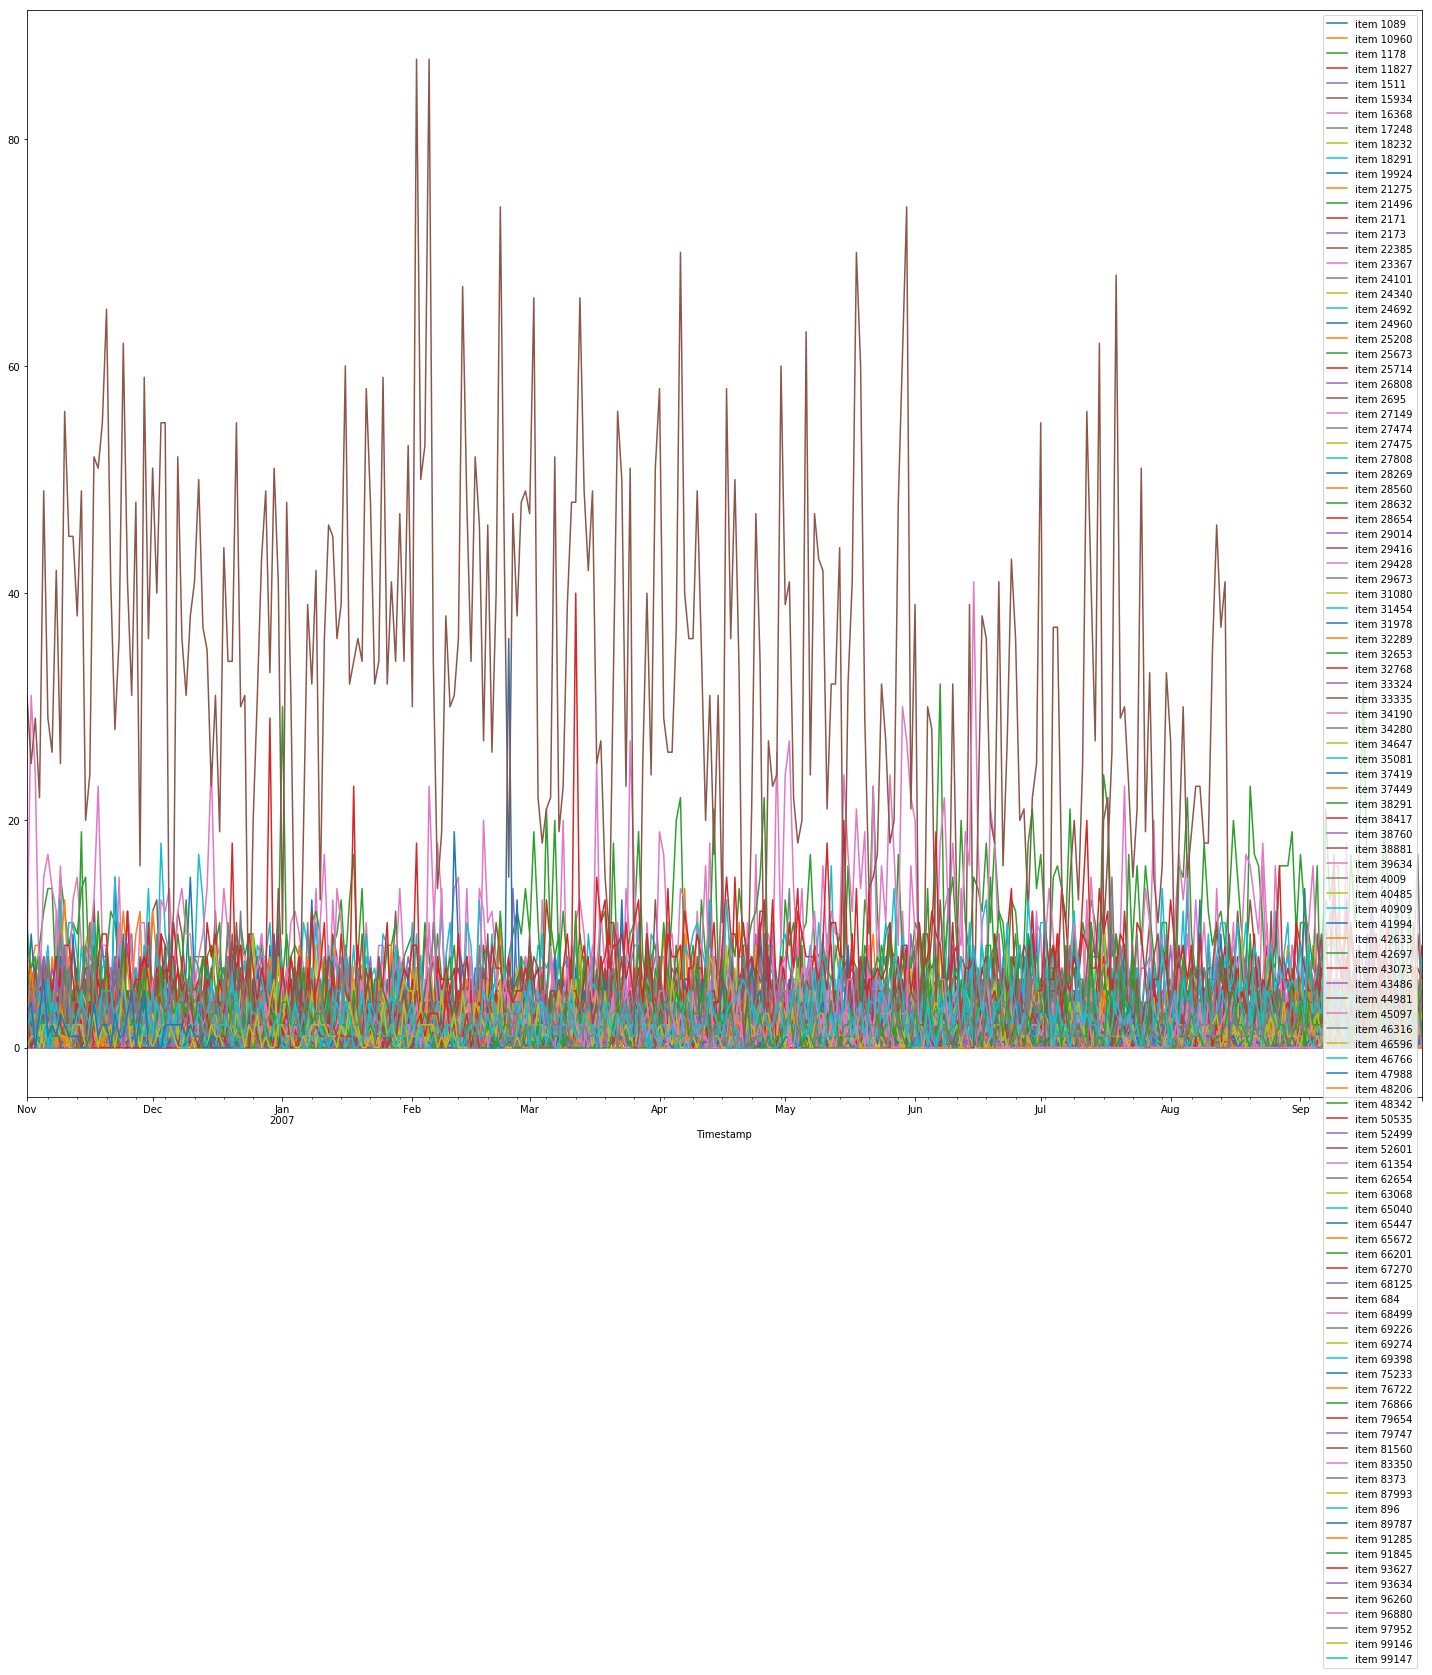

In [98]:
ts = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col= 'Timestamp', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(25,20))

<h1 align="center"> II

# Analyse Data:

In [99]:
ts.head(3)

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2006-11-01        1.0         2.0        0.0         3.0        3.0   
2006-11-02        2.0         2.0        4.0         0.0        0.0   
2006-11-03        4.0         4.0        1.0         3.0        3.0   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
Timestamp                                                                
2006-11-01         0.0         0.0         2.0         3.0         4.0   
2006-11-02         1.0         0.0         5.0         1.0         6.0   
2006-11-03         1.0         0.0         5.0         6.0         7.0   

               ...      item 89787  item 91285  item 91845  item 93627  \
Timestamp      ...                                                       
2006-11-01     ...             3.0         NaN         NaN         NaN   
2006-11-02     ...             4.0         NaN         NaN         NaN   
2006-11-03     ...             0.0         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
Timestamp                                                                
2006-11-01         NaN         NaN         NaN         NaN         NaN   
2006-11-02         NaN         NaN         NaN         NaN         NaN   
2006-11-03         NaN         NaN         NaN         NaN         NaN   

            item 99147  
Timestamp               
2006-11-01         NaN  
2006-11-02         NaN  
2006-11-03         NaN  

[3 rows x 110 columns]

In [100]:
ts_sum = pd.DataFrame(ts.sum(axis=1), columns = ['data'])

In [101]:
ts_sum.head(3)

data
Timestamp          
2006-11-01  228.967
2006-11-02  274.494
2006-11-03  276.026

In [102]:
print(ts_sum.iloc[0])
print('\n', ts_sum.iloc[-1])

data    228.967
Name: 2006-11-01 00:00:00, dtype: float64

 data    91.995
Name: 2007-09-30 00:00:00, dtype: float64


the beginning of the history is 2006-11-01 00:00:00,  and the end of the history of TS is 2007-09-30 00:00:00

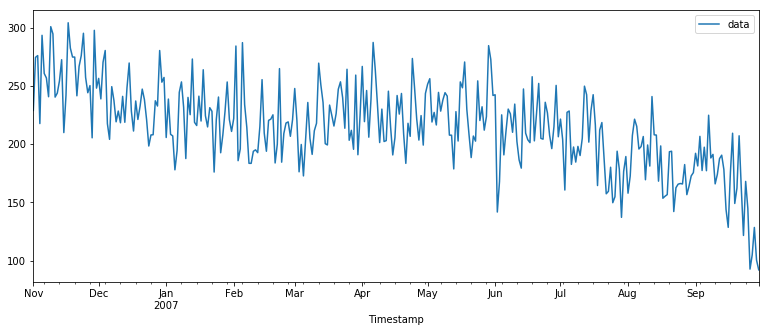

In [103]:
ts_sum.plot(figsize = (13,5))

There is a decreasing trend in the TS. There is no an obvious seasonality (we will check it later). There are some changes in the level of TS

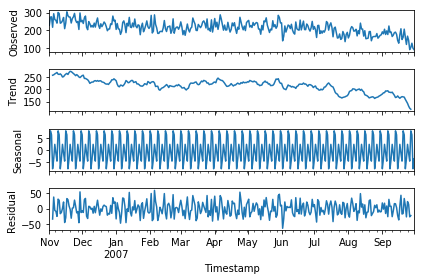

In [104]:
tt = ts_sum.dropna()
res = sm.tsa.seasonal_decompose(tt['data'].resample("D").sum())
resplot = res.plot()
seasonal = res.seasonal

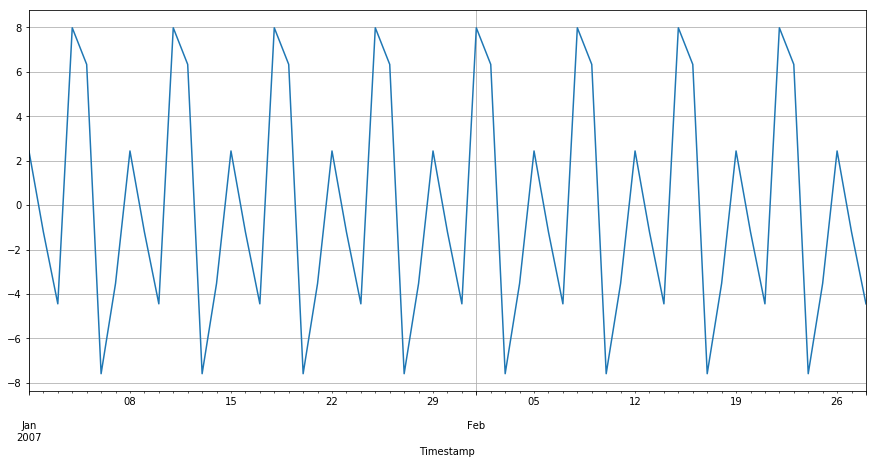

In [105]:
seasonal.loc['2007-01':'2007-02'].plot(figsize=(15,7), grid=(True))

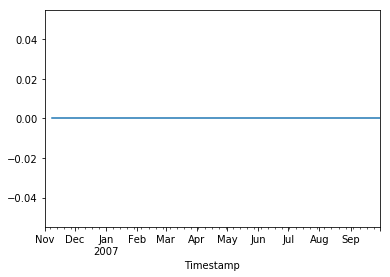

In [106]:
(seasonal - seasonal.shift(7)).plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0ca3eeff28>,)

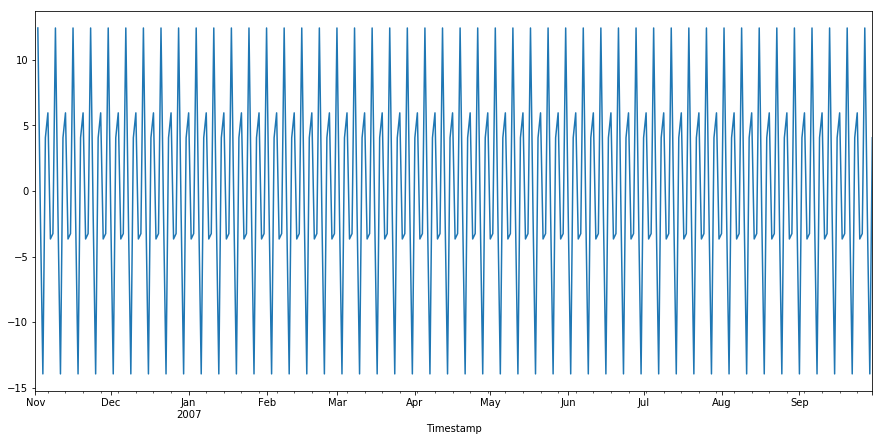

In [107]:
(seasonal - seasonal.shift(1)).plot(figsize = (15,7)),

so seasonality period is 7 days

# Loss Function:


In [138]:
def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((2*(x-y))/(x+y)).abs().replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

In [149]:
ts

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2006-11-01        1.0         2.0        0.0         3.0        3.0   
2006-11-02        2.0         2.0        4.0         0.0        0.0   
2006-11-03        4.0         4.0        1.0         3.0        3.0   
2006-11-04        0.0         3.0        2.0         1.0        1.0   
2006-11-05        4.0         8.0        1.0         2.0        1.0   
2006-11-06        0.0         3.0        1.0         2.0        0.0   
2006-11-07        0.0         3.0        1.0         2.0        1.0   
2006-11-08        0.0         2.0        3.0         1.0        1.0   
2006-11-09        1.0         1.0        1.0         9.0        5.0   
2006-11-10        6.0         0.0        2.0         3.0        3.0   
2006-11-11        0.0         3.0        1.0         3.0        2.0   
2006-11-12        0.0         1.0        0.0         2.0        4.0   
2006-11-13        0.0         2.0        1.0         2.0        1.0   
2006-11-14        0.0         0.0        1.0         5.0        1.0   
2006-11-15        NaN         0.0        1.0         3.0        1.0   
2006-11-16        0.0         2.0        0.0         4.0        0.0   
2006-11-17        2.0         2.0        1.0         3.0        1.0   
2006-11-18        5.0         1.0        1.0         4.0        0.0   
2006-11-19        1.0         4.0        1.0         6.0        0.0   
2006-11-20        1.0         2.0        3.0         5.0        1.0   
2006-11-21        2.0         3.0        2.0         7.0        0.0   
2006-11-22        3.0         2.0        2.0         2.0        2.0   
2006-11-23        0.0         0.0        4.0         4.0        0.0   
2006-11-24        3.0         3.0        5.0         1.0        1.0   
2006-11-25        1.0         1.0        2.0         5.0        1.0   
2006-11-26        1.0         4.0        6.0         4.0        1.0   
2006-11-27        0.0         1.0        3.0         5.0        2.0   
2006-11-28        1.0         3.0        4.0         1.0        0.0   
2006-11-29        2.0         2.0        2.0         1.0        1.0   
2006-11-30        0.0         3.0        2.0         3.0        2.0   
...               ...         ...        ...         ...        ...   
2007-09-01        4.0         6.0        NaN         1.0        NaN   
2007-09-02        0.0         4.0        NaN         1.0        NaN   
2007-09-03        1.0         4.0        NaN         2.0        NaN   
2007-09-04        NaN         9.0        NaN         4.0        NaN   
2007-09-05        2.0         4.0        NaN         7.0        NaN   
2007-09-06        1.0         2.0        NaN         3.0        NaN   
2007-09-07        5.0         9.0        NaN         4.0        NaN   
2007-09-08        1.0         4.0        NaN         4.0        NaN   
2007-09-09        1.0         2.0        NaN         5.0        NaN   
2007-09-10        1.0         3.0        NaN         2.0        NaN   
2007-09-11        0.0         9.0        NaN         5.0        NaN   
2007-09-12        2.0         1.0        NaN         5.0        NaN   
2007-09-13        1.0         1.0        NaN         4.0        NaN   
2007-09-14        4.0         0.0        NaN         1.0        NaN   
2007-09-15        1.0         0.0        NaN         2.0        NaN   
2007-09-16        1.0         2.0        NaN         3.0        NaN   
2007-09-17        0.0         2.0        NaN         3.0        NaN   
2007-09-18        3.0         0.0        NaN         6.0        NaN   
2007-09-19        2.0         0.0        NaN         4.0        NaN   
2007-09-20        1.0         7.0        NaN         3.0        NaN   
2007-09-21        2.0         7.0        NaN         5.0        NaN   
2007-09-22        1.0         2.0        NaN         5.0        NaN   
2007-09-23        0.0         NaN        NaN         1.0        NaN   
2007-09-24        2.0         NaN   

# Train / Test Sets:

In [160]:
# 75% of data goes to train set, 25% goes to test set
train_index = int(ts.shape[0] *75 / 100)
test_index = int(ts.shape[0] * 90 / 100)

In [161]:
train = ts.iloc[:train_index]
test = ts.iloc[:test_index]

---

In [243]:
models = ['IES', 'AES', 'Winter\'s', 'Theil_Wage']

#alpha, gamma, beta
optim_param = np.ones((4,3))
optim_param[:] =np.NAN


In [244]:
optim_param

array([[ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan]])

In [245]:
ts_optimal_params= []

In [246]:
for i in range(ts.shape[1]):
    ts_optimal_params.append(optim_param.copy())

# Models:

## Init Exponential Smoothing IES 

In [247]:
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

## Adaptive Exponential Smoothing AES

In [248]:
# AdaptiveExponentialSmoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    AdaptivePeriod scalar> - adapation period for initialization
#    gamma<scalar in [0,1]> - parametr of cross validation

def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if t<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + (alpha)*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

----

## Find optimal params of the models IES,  AES

In [264]:
#Fit parameters
#ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
h = 1
ALPHA = np.arange(0.1, 1, 0.01)

rng = pd.date_range(train.index[-1]+timedelta(1), train.index[-1]+timedelta(h))
i_frc_ts = pd.DataFrame(index = train.index.append(rng), columns = train.columns)

cntr_count = 0 

for cntr in train.columns:
    min_loss = math.inf
    min_alpha = 0

    for alpha in ALPHA:
        i_frc_ts[cntr] = InitExponentialSmoothing(train[cntr], h, {'alpha':alpha, 'AdaptationPeriod': 7})
        Quality, _ = qualityMACAPE(train[cntr] , i_frc_ts[cntr])

        if(min_loss > Quality):
            min_loss = Quality
            min_alpha = alpha
        
    ts_optimal_params[cntr_count][0][0] = min_alpha
    print('cntr:', cntr_count, 'alpha:', min_alpha,'loss:', min_loss)
    cntr_count = cntr_count+1

cntr: 0 alpha: 0.1 loss: 0.9145857887789447
cntr: 1 alpha: 0.1 loss: 0.6415359501462894
cntr: 2 alpha: 0.14 loss: 0.665014778469989
cntr: 3 alpha: 0.11 loss: 0.5923873761711977
cntr: 4 alpha: 0.1 loss: 0.8665379820993385
cntr: 5 alpha: 0.1 loss: 1.3110028645946474
cntr: 6 alpha: 0.1 loss: 0.8385908822374891
cntr: 7 alpha: 0.2 loss: 0.6800393525902587
cntr: 8 alpha: 0.1 loss: 0.7836626673629091
cntr: 9 alpha: 0.1 loss: 0.6441415638900434
cntr: 10 alpha: 0.1 loss: 0.9431797037290541
cntr: 11 alpha: 0.1 loss: 0.6495930558162321
cntr: 12 alpha: 0.19 loss: 0.7528123335844222
cntr: 13 alpha: 0.1 loss: 0.5770057415809652
cntr: 14 alpha: 0.15 loss: 0.626324290489389
cntr: 15 alpha: 0.1 loss: 0.5270902767069744
cntr: 16 alpha: 0.1 loss: 0.9044105607750016
cntr: 17 alpha: 0.1 loss: 1.130738636052413
cntr: 18 alpha: 0.1 loss: 1.0310290416680004
cntr: 19 alpha: 0.1 loss: 0.833011812736337
cntr: 20 alpha: 0.1 loss: 1.0982077596087718
cntr: 21 alpha: 0.1 loss: 0.7327796940568384
cntr: 22 alpha: 0.1 

In [267]:
#Fit parameters
GAMMA = [0.1, 0.5, 0.01, 0.004, 0.005, 0.006, 0.001, 0.0005, 0.0001, 0.00005, 0.0000001]
ALPHA = np.arange(0.1, 1, 0.05)
a_frc_ts = pd.DataFrame(index = train.index.append(rng), columns = train.columns)

cntr_count = 0

for cntr in train.columns:
    min_loss = math.inf
    min_alpha = 0
    min_gamma = 0
    for alpha in ALPHA:
        for gamma in GAMMA:

            
            a_frc_ts[cntr] = AdaptiveExponentialSmoothing(train[cntr], h, {'alpha':alpha, 'gamma': gamma, 'AdaptationPeriod':7})

            Quality, _ = qualityMACAPE(train[cntr] , a_frc_ts[cntr])

            if(min_loss > Quality):
                min_loss = Quality
                min_alpha = alpha
                min_gamma = gamma
        
    ts_optimal_params[cntr_count][1][0] = min_alpha
    ts_optimal_params[cntr_count][1][1] = min_gamma

    print('cntr:', cntr_count,' alpha:', min_alpha, ' gamma:', min_gamma ,' loss:', min_loss)

    cntr_count = cntr_count+1

cntr: 0  alpha: 0.1  gamma: 0.004  loss: 0.9125594874016536
cntr: 1  alpha: 0.1  gamma: 1e-07  loss: 0.6415039216805987
cntr: 2  alpha: 0.15  gamma: 1e-07  loss: 0.6661899736929755
cntr: 3  alpha: 0.1  gamma: 0.0005  loss: 0.5922601904011525
cntr: 4  alpha: 0.1  gamma: 1e-07  loss: 0.8662472884067313
cntr: 5  alpha: 0.1  gamma: 1e-07  loss: 1.3124552472704
cntr: 6  alpha: 0.1  gamma: 1e-07  loss: 0.8378628598917384
cntr: 7  alpha: 0.35  gamma: 0.1  loss: 0.6702529922669594
cntr: 8  alpha: 0.2  gamma: 0.006  loss: 0.767668384753542
cntr: 9  alpha: 0.45  gamma: 0.01  loss: 0.634606938069726
cntr: 10  alpha: 0.1  gamma: 0.005  loss: 0.9396295290950243
cntr: 11  alpha: 0.1  gamma: 0.001  loss: 0.6479506445952795
cntr: 12  alpha: 0.2  gamma: 0.001  loss: 0.7530212163058526
cntr: 13  alpha: 0.25  gamma: 0.01  loss: 0.5658397259655666
cntr: 14  alpha: 0.15  gamma: 0.004  loss: 0.6259176199442268
cntr: 15  alpha: 0.1  gamma: 0.001  loss: 0.5261682607800593
cntr: 16  alpha: 0.1  gamma: 1e-07  l

## Find optimal params of the models Winters, Theil Wage

In [273]:
h = 1

start = train.index[-1]+timedelta(1)
end = train.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = train.index.append(rng), columns = train.columns)

ALPHA = np.arange(0.1, 1, 0.1)

min_loss= math.inf
min_gamma= 0
min_alpha = 0
plot_loss = []
cntr_count = 0

for cntr in train.columns:
    min_loss = math.inf
    min_alpha = 0
    min_gamma = 0
    
    for alpha in ALPHA:
        for gamma in GAMMA:        
            # ES params
            Params={'alpha':alpha, 'gamma':gamma, 'seasonality_period':7}
            # forecast
            x = np.array(train[cntr])
            frc_ts[cntr] = WintersExponentialSmoothing(x, h, Params)

            Quality, _ = qualityMACAPE(train[cntr], frc_ts[cntr])
            plot_loss.append(Quality)

            if(min_loss > Quality):
                min_loss = Quality
                min_gamma = gamma
                min_alpha = alpha
    
    
    ts_optimal_params[cntr_count][2][0] = min_alpha
    ts_optimal_params[cntr_count][2][1] = min_gamma
        
    print('cntr:', cntr_count,' alpha:', min_alpha, ' gamma:', min_gamma ,' loss:', min_loss)

    cntr_count = cntr_count+1

cntr: 0  alpha: 0.1  gamma: 0.1  loss: 0.9963809234223568
cntr: 1  alpha: 0.1  gamma: 0.1  loss: 0.7032164954400961
cntr: 2  alpha: 0.1  gamma: 0.1  loss: 0.7671193819363483
cntr: 3  alpha: 0.1  gamma: 0.1  loss: 0.6169769001456118
cntr: 4  alpha: 0.1  gamma: 0.1  loss: 0.9587999794339324
cntr: 5  alpha: 0.1  gamma: 0.1  loss: 1.3724131289390222
cntr: 6  alpha: 0.1  gamma: 0.01  loss: 0.8335534423269639
cntr: 7  alpha: 0.1  gamma: 0.5  loss: 0.876128893461445
cntr: 8  alpha: 0.1  gamma: 0.1  loss: 0.8604762423618885
cntr: 9  alpha: 0.1  gamma: 0.1  loss: 0.6847357301564945
cntr: 10  alpha: 0.1  gamma: 0.1  loss: 0.9608998338213387
cntr: 11  alpha: 0.1  gamma: 0.1  loss: 0.6782270612385873
cntr: 12  alpha: 0.1  gamma: 0.1  loss: 0.8204534577866562
cntr: 13  alpha: 0.1  gamma: 0.1  loss: 0.6005659358696493
cntr: 14  alpha: 0.1  gamma: 0.1  loss: 0.6441699469798011
cntr: 15  alpha: 0.1  gamma: 0.1  loss: 0.5509805401038882
cntr: 16  alpha: 0.1  gamma: 0.1  loss: 1.029054642864281
cntr: 17

In [277]:
h = 1

# start = train.index[-1]+timedelta(1)
# end = train.index[-1]+timedelta(h)
# rng = pd.date_range(start, end)

frc_ts = pd.DataFrame(index = train.index.append(rng), columns = train.columns)

ALPHA = np.arange(0.1, 1, 0.1)

min_loss= math.inf
min_beta = 0
min_alpha = 0
min_gamma= 0
cntr_count = 0

for cntr in train.columns:
    min_loss= math.inf
    min_beta = 0
    min_alpha = 0
    min_gamma= 0
    
    for alpha in ALPHA:
        for beta in ALPHA:
            for gamma in GAMMA:
                
                Params={'alpha':alpha, 'beta':beta, 'gamma': gamma, 'seasonality_period':7}
                x = np.array(train[cntr])
                frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)

                Quality, _ = qualityMACAPE(train[cntr] , frc_ts[cntr])

                if(min_loss > Quality):
                    min_loss = Quality
                    min_beta = beta
                    min_alpha = alpha
                    min_gamma = gamma
            #print('alpha:', alpha,'beta:', beta, 'gamma:', gamma,'loss:',  Quality[0])
        
    print('cntr:', cntr_count, 'alpha:', min_alpha,'beta:', min_beta, 'gamma:', min_gamma, 'loss:',  min_loss)

    ts_optimal_params[cntr_count][3][0] = min_alpha
    ts_optimal_params[cntr_count][3][1] = min_gamma
    ts_optimal_params[cntr_count][3][2] = min_beta
    
    cntr_count += 1

cntr: 0 alpha: 0.1 beta: 0.1 gamma: 0.5 loss: 1.0389048633007414
cntr: 1 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.7465263162526716
cntr: 2 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.7950694613865473
cntr: 3 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.6249948459119058
cntr: 4 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.9968418123478756
cntr: 5 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 1.4120375027723597
cntr: 6 alpha: 0.1 beta: 0.1 gamma: 0.01 loss: 0.8703541582409211
cntr: 7 alpha: 0.1 beta: 0.1 gamma: 0.5 loss: 0.8758287777313937
cntr: 8 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.9323389647586307
cntr: 9 alpha: 0.2 beta: 0.1 gamma: 0.1 loss: 0.7875990020571632
cntr: 10 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.9940147517358474
cntr: 11 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.7016558621554557
cntr: 12 alpha: 0.2 beta: 0.1 gamma: 0.1 loss: 0.8583900465359455
cntr: 13 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.6148940807481602
cntr: 14 alpha: 0.1 beta: 0.1 gamma: 0.1 loss: 0.6570255333498192
cntr: 15 alpha: 0.1

In [282]:
import csv

with open("optimal_param.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(ts_optimal_params)

# Forecast each TS by each ES Model with optimal params using first 90% of dates

In [284]:
h = 1
start = test.index[-1]+timedelta(1)
end = test.index[-1]+timedelta(h)
rng = pd.date_range(start, end)

frc_ts_IES = pd.DataFrame(index = test.index.append(rng), columns = test.columns)
frc_ts_AES = pd.DataFrame(index = test.index.append(rng), columns = test.columns)
frc_ts_Winters = pd.DataFrame(index = test.index.append(rng), columns = test.columns)
frc_ts_TheilWage = pd.DataFrame(index = test.index.append(rng), columns = test.columns)

In [ ]:
for cntr, cntr_count in test.columns, range(test.shape[1]):

In [287]:
# ES params

cntr_count = 0

for cntr in test.columns:
    Params_IES = {'alpha':ts_optimal_params[cntr_count][0][0], 'AdaptationPeriod': 7}
    Params_AES = {'alpha':ts_optimal_params[cntr_count][1][0], 'gamma': ts_optimal_params[cntr_count][1][1], 'AdaptationPeriod':7}
    Params_Winters = Params={'alpha':ts_optimal_params[cntr_count][2][0], 'gamma':ts_optimal_params[cntr_count][2][1], 'seasonality_period':7}
    Params_TheilWage = {'alpha':ts_optimal_params[cntr_count][3][0], 'gamma': ts_optimal_params[cntr_count][3][1],'beta':ts_optimal_params[cntr_count][3][2], 'seasonality_period':7}

    x = test[cntr]
    frc_ts_IES[cntr] = InitExponentialSmoothing(x, h, Params_IES)
    frc_ts_AES[cntr] = AdaptiveExponentialSmoothing(x, h, Params_AES)
    frc_ts_Winters[cntr] = WintersExponentialSmoothing(x, h, Params_Winters)
    frc_ts_TheilWage[cntr] = TheilWageExponentialSmoothing(x, h, Params_TheilWage)
    
    cntr_count +=1

In [294]:
test.tail(5)

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2007-08-23        1.0         3.0        NaN         4.0        NaN   
2007-08-24        1.0         1.0        NaN         5.0        NaN   
2007-08-25        2.0         0.0        NaN         3.0        NaN   
2007-08-26        2.0         3.0        NaN         5.0        NaN   
2007-08-27        2.0         1.0        NaN         4.0        NaN   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
Timestamp                                                                
2007-08-23         1.0        16.0         NaN         4.0         5.0   
2007-08-24         4.0         4.0         NaN         4.0         5.0   
2007-08-25         0.0         3.0         NaN         1.0         2.0   
2007-08-26         NaN         7.0         NaN         1.0        12.0   
2007-08-27         0.0         2.0         NaN         1.0         6.0   

               ...      item 89787  item 91285  item 91845  item 93627  \
Timestamp      ...                                                       
2007-08-23     ...             NaN         NaN         NaN         NaN   
2007-08-24     ...             NaN         NaN         NaN         NaN   
2007-08-25     ...             NaN         NaN         NaN         NaN   
2007-08-26     ...             NaN         NaN         NaN         NaN   
2007-08-27     ...             NaN         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
Timestamp                                                                
2007-08-23         NaN         NaN         NaN         NaN         NaN   
2007-08-24         NaN         NaN         NaN         NaN         NaN   
2007-08-25         NaN         NaN         NaN         NaN         NaN   
2007-08-26         NaN         NaN         NaN         NaN         NaN   
2007-08-27         NaN         NaN         NaN         NaN         NaN   

            item 99147  
Timestamp               
2007-08-23         NaN  
2007-08-24         NaN  
2007-08-25         NaN  
2007-08-26         NaN  
2007-08-27         NaN  

[5 rows x 110 columns]

In [297]:
a, b =qualityMACAPE(frc_ts_IES['item 1089'].loc['2007-07-09':'2007-08-27'], ts['item 1089'].loc['2007-07-09':'2007-08-27'])

In [298]:
a

0.800187830854873

# Find the optimal ES algorithm

In [333]:
Qualit_IES = np.zeros(test.shape[1]) * np.NaN
Qualit_AES = np.zeros(test.shape[1]) * np.NaN
Qualit_Winters = np.zeros(test.shape[1]) * np.NaN
Qualit_TheilWage = np.zeros(test.shape[1]) * np.NaN

cntr_count =0

for cntr in test.columns:
    Qualit_IES[cntr_count], _        = qualityMACAPE(frc_ts_IES[cntr].loc['2007-07-09':'2007-08-27'], ts[cntr].loc['2007-07-09':'2007-08-27'])
    Qualit_AES[cntr_count] , _       = qualityMACAPE(frc_ts_AES[cntr].loc['2007-07-09':'2007-08-27'], ts[cntr].loc['2007-07-09':'2007-08-27'])
    Qualit_Winters[cntr_count], _    = qualityMACAPE(frc_ts_Winters[cntr].loc['2007-07-09':'2007-08-27'], ts[cntr].loc['2007-07-09':'2007-08-27'])
    Qualit_TheilWage[cntr_count], _  = qualityMACAPE(frc_ts_TheilWage[cntr].loc['2007-07-09':'2007-08-27'], ts[cntr].loc['2007-07-09':'2007-08-27'])
    
    cntr_count +=1


In [343]:
import math
Qualit_IES_notnan       = np.array([value for value in Qualit_IES if not math.isnan(value)])
Qualit_AES_notnan       = np.array([value for value in Qualit_AES if not math.isnan(value)])
Qualit_Winters_notnan   = np.array([value for value in Qualit_Winters if not math.isnan(value)])
Qualit_TheilWage_notnan = np.array([value for value in Qualit_TheilWage if not math.isnan(value)])

In [345]:
print('Overall all time serieses Losses for each ES are :')
print()
print('IES: ', Qualit_IES_notnan.mean())
print('AES: ', Qualit_AES_notnan.mean())
print('Winters: ', Qualit_Winters_notnan.mean())
print('TheilWage: ', Qualit_TheilWage_notnan.mean())

Overall all time serieses Losses for each ES are :

IES:  0.959843325216
AES:  0.95458737048
Winters:  0.991657478396
TheilWage:  1.06281469133


Overall all time serieses Losses for each ES are :

IES:  0.959843325216

AES:  0.95458737048

Winters:  0.991657478396

TheilWage:  1.06281469133

#### The optimal ES algorithm: comparing losses of ES models with optimal params calclated for dates that were not used for tuning parameters is AES  model

#### Now for each TS:

In [359]:
optimal_es_ts = []
for i in range(test.shape[1]):
    a = np.array([Qualit_IES[i], Qualit_AES[i], Qualit_Winters[i], Qualit_TheilWage[i]])
    optimal_es_ts.append(a.argmin())


#### 0: IES,  1: AES,  2:Winters,  3:TheilWage

In [363]:
print(optimal_es_ts)

[1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


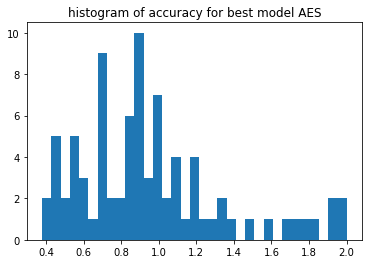

In [372]:
plt.hist(pd.Series(Qualit_AES).dropna(), bins=33)
plt.title('histogram of accuracy for best model AES')
plt.show()

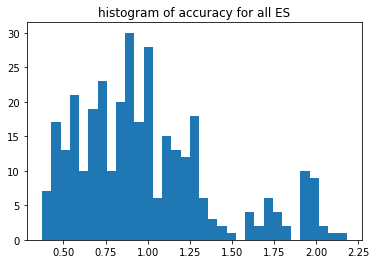

In [383]:
loss_all_es=  np.array([Qualit_IES_notnan, Qualit_AES_notnan, Qualit_Winters_notnan, Qualit_TheilWage_notnan])
loss_all_es =loss_all_es.flatten()
plt.hist(pd.Series(loss_all_es).dropna(), bins=33)
plt.title('histogram of accuracy for all ES')
plt.show()